<a href="https://colab.research.google.com/github/sebojal/Clase/blob/main/Copy_of_ProyectoAC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpiando y uniendo las bases de datos

### Inicializacion

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importando las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [4]:
#importando los datos
df_GINI= pd.read_csv('/content/drive/MyDrive/Proyecto AC/GINI_coefficient.csv')
df_happy = pd.read_csv('/content/drive/MyDrive/Proyecto AC/happiness-cantril-ladder.csv')
df_EducAT = pd.read_csv('/content/drive/MyDrive/Proyecto AC/Educacion_attainment.csv')
df_health = pd.read_csv('/content/drive/MyDrive/Proyecto AC/datos/hospital_beds_per_1000.csv')
df_UnemILO = pd.read_csv('/content/drive/MyDrive/Proyecto AC/Unemployment_ILO.csv')
df_UnemNat = pd.read_csv('/content/drive/MyDrive/Proyecto AC/Unemployment_National.csv')
df_PIB = pd.read_csv('/content/drive/MyDrive/Proyecto AC/PIB_Percapita.csv')
df_access_for_cooking = pd.read_csv('/content/drive/MyDrive/Proyecto AC/datos/Access_fuels_technologies_for_cooking.csv')
df_access_to_electricity = pd.read_csv('/content/drive/MyDrive/Proyecto AC/datos/Access_to_electricity.csv')
df_Adolescents_out_school = pd.read_csv('/content/drive/MyDrive/Proyecto AC/datos/Adolescents_out_of_school.csv')
df_compensation_of_employees = pd.read_csv('/content/drive/MyDrive/Proyecto AC/datos/compensation_of_employees.csv')
df_consumer_price_index = pd.read_csv('/content/drive/MyDrive/Proyecto AC/datos/Inflation.csv')
df_control_of_corruption = pd.read_csv('/content/drive/MyDrive/Proyecto AC/datos/control_of_corruption.csv')
df_cost_business_startup = pd.read_csv('/content/drive/MyDrive/Proyecto AC/datos/cost_of_business_startup.csv')
df_hdi = pd.read_csv('/content/drive/MyDrive/Proyecto AC/datos/human_development_index.csv', encoding='ISO-8859-1')

In [5]:
df_hdi.head()

Code       Entity  Year    HDI
0  AFG  Afghanistan  2011  0.457
1  AFG  Afghanistan  2012  0.467
2  AFG  Afghanistan  2013  0.475
3  AFG  Afghanistan  2014  0.480
4  AFG  Afghanistan  2015  0.479

In [6]:
df_happy.head()

Entity Code  Year  Cantril ladder score
0  Afghanistan  AFG  2011               4.25835
1  Afghanistan  AFG  2014               3.57500
2  Afghanistan  AFG  2015               3.36000
3  Afghanistan  AFG  2016               3.79400
4  Afghanistan  AFG  2017               3.63150

In [7]:
df_GINI_backup = df_GINI.copy(deep = True)
df_EducAT_backup = df_EducAT.copy(deep = True)
df_health_backup = df_health.copy(deep = True)
df_UnemILO_backup = df_UnemILO.copy(deep = True)
df_UnemNat_backup = df_UnemNat.copy(deep = True)
df_PIB_backup = df_PIB.copy(deep = True)
df_happy_backup = df_happy.copy(deep = True)

df_access_for_cooking_backup = df_access_for_cooking.copy(deep = True)
df_access_to_electricity_backup = df_access_to_electricity.copy(deep = True)
df_Adolescents_out_school_backup = df_Adolescents_out_school.copy(deep = True)
df_compensation_of_employees_backup = df_compensation_of_employees.copy(deep = True)
df_consumer_price_index_backup = df_consumer_price_index.copy(deep = True)
df_control_of_corruption_backup = df_control_of_corruption.copy(deep = True)
df_cost_business_startup_backup = df_cost_business_startup.copy(deep = True)
df_hdi_backup = df_hdi.copy(deep = True)

In [8]:
df_PIB_backup.head()

Series Name     Series Code    Country Name Country Code  \
0  GDP per capita (current US$)  NY.GDP.PCAP.CD     Afghanistan          AFG   
1  GDP per capita (current US$)  NY.GDP.PCAP.CD         Albania          ALB   
2  GDP per capita (current US$)  NY.GDP.PCAP.CD         Algeria          DZA   
3  GDP per capita (current US$)  NY.GDP.PCAP.CD  American Samoa          ASM   
4  GDP per capita (current US$)  NY.GDP.PCAP.CD         Andorra          AND   

      2011 [YR2011]     2012 [YR2012]     2013 [YR2013]     2014 [YR2014]  \
0  608.738850364613  653.417474910283   638.73318101404  626.512929086139   
1  4437.14116097061  4247.63134315945  4413.06338346821  4578.63320812155   
2  5974.57008682611  6096.09001549263  6044.67490330703  6164.64469897525   
3  10495.3047320935  11920.0610903131  12038.8715916596  12313.9973571825   
4  51428.1969515188  44902.3807663645  44747.7538641695  45680.5349920165   

      2015 [YR2015]     2016 [YR2016]     2017 [YR2017]     2018 [YR2018]  \
0  566.881129708434  523.053011984748  526.140801025756  492.090630986151   
1  3952.80357364813  4124.05538986272  4531.03220675893  5287.66080067575   
2  4741.49977033558  4481.08196153066  4615.86874364885  4640.31414537956   
3  13101.5418159165  13300.8246114811  12372.8847825647  13195.9358995539   
4  38885.5303222983  39931.2169800216  40632.2315521995  42904.8284559223   

      2019 [YR2019]     2020 [YR2020]     2021 [YR2021]     2022 [YR2022]  \
0  497.741431256813  512.055098005672  355.777826392648  352.603733092107   
1   5396.2142432843   5343.0377039956  6377.20309553753  6810.11404104233   
2  4530.10174483631  3794.40952448639   4216.2512851303  5023.25293164928   
3   13672.576657298  15609.7772196843  16653.7137781725  19673.3901023197   
4  41328.6004978373  37207.2219994994  42066.4905178822  42350.6970690874   

      2023 [YR2023]  
0                ..  
1  8367.77573143421  
2  5260.20624980797  
3                ..  
4  46544.7207199483

### PIB per capita

In [9]:
df_PIB = df_PIB_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

#Extraer el numero de, para identificar el año con un numero
df_PIB.columns = [extract_number(col) for col in df_PIB.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
#df_PIB = df_PIB[df_PIB['Country Code'].isin(df_GINI['Country Code'])]

# Melt the GDP and Gini index columns
df_PIB = pd.melt(df_PIB, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_PIB.columns if isinstance(col, int)],
                  var_name = "Year", value_name = 'GDP_p/c')

df_sorted = df_PIB.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Poniendole
df_PIB = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float y int
df_PIB['GDP_p/c'] = df_PIB['GDP_p/c'].replace('..', 0)
df_PIB['GDP_p/c'] = df_PIB['GDP_p/c'].astype(float)
df_PIB['GDP_p/c'] = df_PIB['GDP_p/c'].replace(0, pd.NA)
df_PIB['Country Name'] = df_PIB['Country Name'].astype(str)
df_PIB['Country Code'] = df_PIB['Country Code'].astype(str)
df_PIB['Year'] = df_PIB['Year'].astype(int)
df_PIB['GDP_p/c'] = df_PIB['GDP_p/c'].apply(pd.to_numeric, errors='coerce')


In [10]:
df_PIB.head()

Country Name Country Code  Year     GDP_p/c
0  Afghanistan          AFG  2011  608.738850
1  Afghanistan          AFG  2012  653.417475
2  Afghanistan          AFG  2013  638.733181
3  Afghanistan          AFG  2014  626.512929
4  Afghanistan          AFG  2015  566.881130

In [11]:
df_PIB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3458 entries, 0 to 3457
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  3458 non-null   object 
 1   Country Code  3458 non-null   object 
 2   Year          3458 non-null   int64  
 3   GDP_p/c       3330 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 135.1+ KB


In [12]:
df_PIB.isnull().sum()

Country Name      0
Country Code      0
Year              0
GDP_p/c         128
dtype: int64

In [13]:
#Encontrando el conjunto de paises sin datos.
no_values = df_PIB.groupby('Country Name')['GDP_p/c'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

In [14]:
print(countries_with_all_nulls)

['British Virgin Islands', 'Gibraltar', "Korea, Dem. People's Rep.", 'Not classified']


In [15]:
#Eliminando los países sin datos
df_PIB = df_PIB[~df_PIB['Country Name'].isin(countries_with_all_nulls)]

In [16]:
def fill_missing_gdp(group):
    # Calculate the growth rate
    valid_values = group['GDP_p/c'].dropna()
    if len(valid_values) < 2:
        return group  # Not enough data to calculate growth rate

    growth_rate = (valid_values.iloc[-1] / valid_values.iloc[0]) ** (1 / (len(valid_values) - 1)) - 1

    # Fill forward (for values after the last valid data)
    for idx in group.index:
        if pd.isna(group.loc[idx, 'GDP_p/c']):
            # Check if it's after last valid data
            if idx > valid_values.index[-1]:
                previous_value = group.loc[idx - 1, 'GDP_p/c'] if idx - 1 in group.index else None
                if previous_value is not None:
                    group.loc[idx, 'GDP_p/c'] = previous_value * (1 + growth_rate)
            # Check if it's before first valid data
            elif idx < valid_values.index[0]:
                next_value = group.loc[idx + 1, 'GDP_p/c'] if idx + 1 in group.index else None
                if next_value is not None:
                    group.loc[idx, 'GDP_p/c'] = next_value / (1 + growth_rate)

    return group

In [17]:
df_PIB = df_PIB.groupby('Country Name').apply(fill_missing_gdp)

In [18]:
df_PIB.isnull().sum()

Country Name     0
Country Code     0
Year             0
GDP_p/c         23
dtype: int64

In [19]:
Datos_insuficientes = df_PIB[df_PIB['GDP_p/c'].isnull()]
print(Datos_insuficientes)

#Solo se encontraron 2 paises sin datos, por lo tanto fueron eliminados.

                                           Country Name Country Code  Year  \
Country Name                                                                 
Channel Islands          572            Channel Islands          CHI  2011   
                         573            Channel Islands          CHI  2012   
                         574            Channel Islands          CHI  2013   
                         575            Channel Islands          CHI  2014   
Eritrea                  911                    Eritrea          ERI  2012   
                         912                    Eritrea          ERI  2013   
                         913                    Eritrea          ERI  2014   
                         914                    Eritrea          ERI  2015   
                         915                    Eritrea          ERI  2016   
                         916                    Eritrea          ERI  2017   
                         917                    Eritrea         

In [20]:
df_PIB = df_PIB.dropna(subset=['GDP_p/c'])

In [21]:
df_PIB.isnull().sum()

Country Name    0
Country Code    0
Year            0
GDP_p/c         0
dtype: int64

In [22]:
df_PIB.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3383 entries, ('Afghanistan', 0) to ('Zimbabwe', 3457)
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  3383 non-null   object 
 1   Country Code  3383 non-null   object 
 2   Year          3383 non-null   int64  
 3   GDP_p/c       3383 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 284.8+ KB


### Educational Attainment

In [23]:
df_EducAT = df_EducAT_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_EducAT.columns = [extract_number(col) for col in df_EducAT.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_EducAT = df_EducAT[df_EducAT['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_EducAT = pd.melt(df_EducAT, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_EducAT.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Educ_attainment")

df_sorted = df_EducAT.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_EducAT = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_EducAT['Educ_attainment'] = df_EducAT['Educ_attainment'].replace('..', 0)
df_EducAT['Educ_attainment'] = df_EducAT['Educ_attainment'].astype(float)
df_EducAT['Educ_attainment'] = df_EducAT['Educ_attainment'].replace(0, pd.NA)
df_EducAT['Country Name'] = df_EducAT['Country Name'].astype(str)
df_EducAT['Country Code'] = df_EducAT['Country Code'].astype(str)
df_EducAT['Year'] = df_EducAT['Year'].astype(int)

df_EducAT.head()

Country Name Country Code  Year Educ_attainment
0  Afghanistan          AFG  2011            <NA>
1  Afghanistan          AFG  2012            <NA>
2  Afghanistan          AFG  2013            <NA>
3  Afghanistan          AFG  2014        9.698487
4  Afghanistan          AFG  2015         9.79236

In [24]:
unmelted_EducAT = df_EducAT.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Educ_attainment').reset_index()
unmelted_EducAT_copy = df_EducAT.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Educ_attainment').reset_index()

# Convert applicable columns to numeric
unmelted_EducAT = unmelted_EducAT.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_EducAT = unmelted_EducAT.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_EducAT = unmelted_EducAT.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_EducAT = unmelted_EducAT.fillna(method='bfill', axis=1)

unmelted_EducAT['Country Name'] = unmelted_EducAT_copy['Country Name']
unmelted_EducAT['Country Code'] = unmelted_EducAT_copy['Country Code']

#Melteando la base de nuevo
df_EducAT = pd.melt(unmelted_EducAT, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_EducAT.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Educ_attainment")

df_sorted = df_EducAT.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_EducAT = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_EducAT.groupby('Country Name')['Educ_attainment'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_EducAT = df_EducAT[~df_EducAT['Country Name'].isin(countries_with_all_nulls)]

df_EducAT['Year'] = df_EducAT['Year'].astype(int)

In [25]:
df_EducAT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 0 to 3405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     2392 non-null   object 
 1   Country Code     2392 non-null   object 
 2   Year             2392 non-null   int64  
 3   Educ_attainment  2392 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 93.4+ KB


In [26]:
df_EducAT.isnull().sum()

Country Name       0
Country Code       0
Year               0
Educ_attainment    0
dtype: int64

### Para Health

In [27]:
df_health = df_health_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_health.columns = [extract_number(col) for col in df_health.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_health = df_health[df_health['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_health = pd.melt(df_health, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_health.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Beds_p/1000")

df_sorted = df_health.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_health = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_health['Beds_p/1000'] = df_health['Beds_p/1000'].replace('..', 0)
df_health['Beds_p/1000'] = df_health['Beds_p/1000'].astype(float)
df_health['Beds_p/1000'] = df_health['Beds_p/1000'].replace(0, pd.NA)
df_health['Country Name'] = df_health['Country Name'].astype(str)
df_health['Country Code'] = df_health['Country Code'].astype(str)
df_health['Year'] = df_health['Year'].astype(int)

df_health.head()

Country Name Country Code  Year Beds_p/1000
0  Afghanistan          AFG  2011        0.45
1  Afghanistan          AFG  2012        0.47
2  Afghanistan          AFG  2013        0.46
3  Afghanistan          AFG  2014        0.46
4  Afghanistan          AFG  2015        0.44

In [28]:
unmelted_df = df_health.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Beds_p/1000').reset_index()
unmelted_copy = df_health.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Beds_p/1000').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_df['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo

df_health = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Beds_p/1000")

df_sorted = df_health.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_health = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_health.groupby('Country Name')['Beds_p/1000'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_health = df_health[~df_health['Country Name'].isin(countries_with_all_nulls)]

df_health['Year'] = df_health['Year'].astype(int)

In [29]:
df_health.head()

Country Name Country Code  Year  Beds_p/1000
0          0.17          PNG  2011         0.17
1          0.17          PNG  2012         0.17
2          0.17          PNG  2013         0.17
3          0.17          PNG  2014         0.17
4          0.17          PNG  2015         0.17

In [30]:
df_health

Country Name Country Code  Year  Beds_p/1000
0             0.17          PNG  2011         0.17
1             0.17          PNG  2012         0.17
2             0.17          PNG  2013         0.17
3             0.17          PNG  2014         0.17
4             0.17          PNG  2015         0.17
...            ...          ...   ...          ...
2634         18.32          MCO  2019        22.02
2635         18.32          MCO  2020        22.02
2636         18.32          MCO  2021        22.02
2637         18.32          MCO  2022        22.02
2638         18.32          MCO  2023        22.02

[2639 rows x 4 columns]

In [31]:
df_health.isnull().sum()

Country Name    0
Country Code    0
Year            0
Beds_p/1000     0
dtype: int64

In [32]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2639 entries, 0 to 2638
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  2639 non-null   float64
 1   Country Code  2639 non-null   object 
 2   Year          2639 non-null   int64  
 3   Beds_p/1000   2639 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 103.1+ KB


### Para UnemILO

In [33]:
df_UnemILO = df_UnemILO_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_UnemILO.columns = [extract_number(col) for col in df_UnemILO.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_UnemILO = df_UnemILO[df_UnemILO['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_UnemILO = pd.melt(df_UnemILO, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_UnemILO.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Unem_ILO")

df_sorted = df_UnemILO.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_UnemILO = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_UnemILO['Unem_ILO'] = df_UnemILO['Unem_ILO'].replace('..', 0)
df_UnemILO['Unem_ILO'] = df_UnemILO['Unem_ILO'].astype(float)
df_UnemILO['Unem_ILO'] = df_UnemILO['Unem_ILO'].replace(0, pd.NA)
df_UnemILO['Country Name'] = df_UnemILO['Country Name'].astype(str)
df_UnemILO['Country Code'] = df_UnemILO['Country Code'].astype(str)
df_UnemILO['Year'] = df_UnemILO['Year'].astype(int)

df_UnemILO.head()

Country Name Country Code  Year Unem_ILO
0  Afghanistan          AFG  2011    7.916
1  Afghanistan          AFG  2012    7.909
2  Afghanistan          AFG  2013    7.919
3  Afghanistan          AFG  2014    7.915
4  Afghanistan          AFG  2015    9.011

In [34]:
unmelted_df = df_UnemILO.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Unem_ILO').reset_index()
unmelted_copy = df_UnemILO.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Unem_ILO').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_UnemILO = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Unem_ILO")

df_sorted = df_UnemILO.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_UnemILO = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_UnemILO.groupby('Country Name')['Unem_ILO'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_UnemILO = df_UnemILO[~df_UnemILO['Country Name'].isin(countries_with_all_nulls)]

df_UnemILO['Year'] = df_UnemILO['Year'].astype(int)

In [35]:
df_UnemILO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3042 entries, 0 to 3405
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  3042 non-null   object 
 1   Country Code  3042 non-null   object 
 2   Year          3042 non-null   int64  
 3   Unem_ILO      3042 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 118.8+ KB


### Desempleo nacional

In [36]:
df_UnemNat = df_UnemNat_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_UnemNat.columns = [extract_number(col) for col in df_UnemNat.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_UnemNat = df_UnemNat[df_UnemNat['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_UnemNat = pd.melt(df_UnemNat, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_UnemNat.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Unem_NAT")

df_sorted = df_UnemNat.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_UnemNat = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_UnemNat['Unem_NAT'] = df_UnemNat['Unem_NAT'].replace('..', 0)
df_UnemNat['Unem_NAT'] = df_UnemNat['Unem_NAT'].astype(float)
df_UnemNat['Unem_NAT'] = df_UnemNat['Unem_NAT'].replace(0, pd.NA)
df_UnemNat['Country Name'] = df_UnemNat['Country Name'].astype(str)
df_UnemNat['Country Code'] = df_UnemNat['Country Code'].astype(str)
df_UnemNat['Year'] = df_UnemNat['Year'].astype(int)

df_UnemNat.head()

Country Name Country Code  Year Unem_NAT
0  Afghanistan          AFG  2011     <NA>
1  Afghanistan          AFG  2012    1.692
2  Afghanistan          AFG  2013     <NA>
3  Afghanistan          AFG  2014    7.915
4  Afghanistan          AFG  2015     <NA>

In [37]:
unmelted_df = df_UnemNat.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Unem_NAT').reset_index()
unmelted_copy = df_UnemNat.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Unem_NAT').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_UnemNat = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Unem_NAT")

df_sorted = df_UnemNat.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_UnemNat = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_UnemNat.groupby('Country Name')['Unem_NAT'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_UnemNat = df_UnemNat[~df_UnemNat['Country Name'].isin(countries_with_all_nulls)]

df_UnemNat['Year'] = df_UnemNat['Year'].astype(int)

In [38]:
df_UnemNat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2951 entries, 0 to 3405
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  2951 non-null   object 
 1   Country Code  2951 non-null   object 
 2   Year          2951 non-null   int64  
 3   Unem_NAT      2951 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 115.3+ KB


### Coeficiente GINI

In [39]:
df_GINI = df_GINI_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_GINI.columns = [extract_number(col) for col in df_GINI.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_GINI = df_GINI[df_GINI['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_GINI = pd.melt(df_GINI, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_GINI.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "GINI")

df_sorted = df_GINI.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_GINI = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_GINI['GINI'] = df_GINI['GINI'].replace('..', 0)
df_GINI['GINI'] = df_GINI['GINI'].astype(float)
df_GINI['GINI'] = df_GINI['GINI'].replace(0, pd.NA)
df_GINI['Country Name'] = df_GINI['Country Name'].astype(str)
df_GINI['Country Code'] = df_GINI['Country Code'].astype(str)
df_GINI['Year'] = df_GINI['Year'].astype(int)

df_GINI.head()

Country Name Country Code  Year  GINI
0  Afghanistan          AFG  2011  <NA>
1  Afghanistan          AFG  2012  <NA>
2  Afghanistan          AFG  2013  <NA>
3  Afghanistan          AFG  2014  <NA>
4  Afghanistan          AFG  2015  <NA>

In [40]:
unmelted_df = df_GINI.pivot(index=['Country Name', 'Country Code'], columns='Year', values='GINI').reset_index()
unmelted_copy = df_GINI.pivot(index=['Country Name', 'Country Code'], columns='Year', values='GINI').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_GINI = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "GINI")

df_sorted = df_GINI.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_GINI = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_GINI.groupby('Country Name')['GINI'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_GINI = df_GINI[~df_GINI['Country Name'].isin(countries_with_all_nulls)]

df_GINI['Year'] = df_GINI['Year'].astype(int)

In [41]:
df_GINI.shape

(2080, 4)

In [42]:
df_GINI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 39 to 3405
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  2080 non-null   object 
 1   Country Code  2080 non-null   object 
 2   Year          2080 non-null   int64  
 3   GINI          2080 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 81.2+ KB


### Variable de felicidad

In [43]:
df_happy.head()

Entity Code  Year  Cantril ladder score
0  Afghanistan  AFG  2011               4.25835
1  Afghanistan  AFG  2014               3.57500
2  Afghanistan  AFG  2015               3.36000
3  Afghanistan  AFG  2016               3.79400
4  Afghanistan  AFG  2017               3.63150

In [44]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                1787 non-null   object 
 1   Code                  1677 non-null   object 
 2   Year                  1787 non-null   int64  
 3   Cantril ladder score  1787 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 56.0+ KB


In [45]:
df_happy = df_happy_backup.copy(deep = True)
df_happy['Cantril ladder score'] = df_happy['Cantril ladder score'].replace('..', 0)
df_happy['Cantril ladder score'] = df_happy['Cantril ladder score'].astype(float)
df_happy['Cantril ladder score'] = df_happy['Cantril ladder score'].replace(0, pd.NA)
df_happy['Code'] = df_happy['Code'].astype(str)
df_happy['Code'] = df_happy['Code'].astype(str)
df_happy['Year'] = df_happy['Year'].astype(int)

In [46]:
unmelted_df = df_happy.pivot(index=['Entity', 'Code'], columns='Year', values='Cantril ladder score').reset_index()
unmelted_copy = df_happy.pivot(index=['Entity', 'Code'], columns='Year', values='Cantril ladder score').reset_index()
unmelted_df[2012] = np.nan
unmelted_df[2013] = np.nan

other_cols = ['Entity'] + ['Code']
year_cols = sorted([col for col in unmelted_df.columns if (col != 'Entity') & (col != 'Code')])
unmelted_df = unmelted_df[other_cols + year_cols]


# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Entity'] = unmelted_copy['Entity']
unmelted_df['Code'] = unmelted_copy['Code']

#Melteando la base de nuevo
df_happy = pd.melt(unmelted_df, id_vars = ["Entity", "Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Ladder_score")

df_happy = df_happy.sort_values(by = ["Entity", "Year"])
df_happy.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_happy = df_happy[df_happy['Entity'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_happy.groupby('Entity')['Ladder_score'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_happy = df_happy[~df_happy['Entity'].isin(countries_with_all_nulls)]

In [47]:
unmelted_df.head()

Year       Entity Code      2011      2012      2013      2014      2015  \
0     Afghanistan  AFG  4.258350  4.030567  3.802783  3.575000  3.360000   
1          Africa  nan  4.453107  4.460124  4.467141  4.474157  4.395968   
2         Albania  ALB  5.133704  5.075469  5.017235  4.959000  4.655000   
3         Algeria  DZA  5.367827  5.446885  5.525942  5.605000  6.355000   
4          Angola  AGO  4.178380  4.129920  4.081460  4.033000  3.866000   

Year      2016      2017      2018      2019      2020      2021      2022  \
0     3.794000  3.631500  3.203300  2.566900  2.522900  2.403800  1.859000   
1     4.457408  4.445971  4.511974  4.459995  4.551006  4.517288  4.426524   
2     4.644000  4.586000  4.718600  4.882700  5.117400  5.198800  5.277300   
3     5.872000  5.294600  5.211300  5.005100  4.887100  5.122300  5.329100   
4     3.795000  3.794800  3.794800  3.794800  3.794800  3.794800  3.794800   

Year      2023  
0     1.721000  
1     4.384616  
2     5.304200  
3     5.363500  
4     3.794800

In [48]:
df_happy.head()

Entity Code  Year  Ladder_score
0  Afghanistan  AFG  2011      4.258350
1  Afghanistan  AFG  2012      4.030567
2  Afghanistan  AFG  2013      3.802783
3  Afghanistan  AFG  2014      3.575000
4  Afghanistan  AFG  2015      3.360000

In [49]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entity        2314 non-null   object 
 1   Code          2314 non-null   object 
 2   Year          2314 non-null   object 
 3   Ladder_score  2314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 72.4+ KB


In [50]:
df_happy['Year'] = df_happy['Year'].astype(int)

In [51]:
df_happy.isnull().sum()

Entity          0
Code            0
Year            0
Ladder_score    0
dtype: int64

### Acceso a tecnologias y energias

In [52]:
df_access_for_cooking = df_access_for_cooking_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_access_for_cooking.columns = [extract_number(col) for col in df_access_for_cooking.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_access_for_cooking = df_access_for_cooking[df_access_for_cooking['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_access_for_cooking = pd.melt(df_access_for_cooking, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_access_for_cooking.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Access_cooking_tech")

df_sorted = df_access_for_cooking.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_access_for_cooking = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_access_for_cooking['Access_cooking_tech'] = df_access_for_cooking['Access_cooking_tech'].replace('..', 0)
df_access_for_cooking['Access_cooking_tech'] = df_access_for_cooking['Access_cooking_tech'].astype(float)
df_access_for_cooking['Access_cooking_tech'] = df_access_for_cooking['Access_cooking_tech'].replace(0, pd.NA)
df_access_for_cooking['Country Name'] = df_access_for_cooking['Country Name'].astype(str)
df_access_for_cooking['Country Code'] = df_access_for_cooking['Country Code'].astype(str)
df_access_for_cooking['Year'] = df_access_for_cooking['Year'].astype(int)

df_access_for_cooking.head()

Country Name Country Code  Year Access_cooking_tech
0  Afghanistan          AFG  2011                21.3
1  Afghanistan          AFG  2012                22.9
2  Afghanistan          AFG  2013                24.5
3  Afghanistan          AFG  2014                26.1
4  Afghanistan          AFG  2015                27.6

In [53]:
unmelted_df = df_access_for_cooking.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Access_cooking_tech').reset_index()
unmelted_copy = df_access_for_cooking.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Access_cooking_tech').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_access_for_cooking = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Access_cooking_tech")

df_sorted = df_access_for_cooking.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_access_for_cooking = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_access_for_cooking.groupby('Country Name')['Access_cooking_tech'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_access_for_cooking = df_access_for_cooking[~df_access_for_cooking['Country Name'].isin(countries_with_all_nulls)]

df_access_for_cooking['Year'] = df_access_for_cooking['Year'].astype(int)

### Acceso a la electricidad

In [54]:
df_access_to_electricity = df_access_to_electricity_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_access_to_electricity.columns = [extract_number(col) for col in df_access_to_electricity.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_access_to_electricity = df_access_to_electricity[df_access_to_electricity['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_access_to_electricity = pd.melt(df_access_to_electricity, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_access_to_electricity.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Access_electricity")

df_sorted = df_access_to_electricity.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_access_to_electricity = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_access_to_electricity['Access_electricity'] = df_access_to_electricity['Access_electricity'].replace('..', 0)
df_access_to_electricity['Access_electricity'] = df_access_to_electricity['Access_electricity'].astype(float)
df_access_to_electricity['Access_electricity'] = df_access_to_electricity['Access_electricity'].replace(0, pd.NA)
df_access_to_electricity['Country Name'] = df_access_to_electricity['Country Name'].astype(str)
df_access_to_electricity['Country Code'] = df_access_to_electricity['Country Code'].astype(str)
df_access_to_electricity['Year'] = df_access_to_electricity['Year'].astype(int)

df_access_to_electricity.head()

Country Name Country Code  Year Access_electricity
0  Afghanistan          AFG  2011               43.2
1  Afghanistan          AFG  2012               69.1
2  Afghanistan          AFG  2013               68.0
3  Afghanistan          AFG  2014               89.5
4  Afghanistan          AFG  2015               71.5

In [55]:
unmelted_df = df_access_to_electricity.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Access_electricity').reset_index()
unmelted_copy = df_access_to_electricity.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Access_electricity').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_access_to_electricity = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Access_electricity")

df_sorted = df_access_to_electricity.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_access_to_electricity = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_access_to_electricity.groupby('Country Name')['Access_electricity'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_access_to_electricity = df_access_to_electricity[~df_access_to_electricity['Country Name'].isin(countries_with_all_nulls)]

df_access_to_electricity['Year'] = df_access_to_electricity['Year'].astype(int)

### Adolesentes salidos de la escuela

In [56]:
df_Adolescents_out_school = df_Adolescents_out_school_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_Adolescents_out_school.columns = [extract_number(col) for col in df_Adolescents_out_school.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_Adolescents_out_school = df_Adolescents_out_school[df_Adolescents_out_school['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_Adolescents_out_school = pd.melt(df_Adolescents_out_school, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_Adolescents_out_school.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Adolescents_out_school")

df_sorted = df_Adolescents_out_school.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_Adolescents_out_school = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_Adolescents_out_school['Adolescents_out_school'] = df_Adolescents_out_school['Adolescents_out_school'].replace('..', 0)
df_Adolescents_out_school['Adolescents_out_school'] = df_Adolescents_out_school['Adolescents_out_school'].astype(float)
df_Adolescents_out_school['Adolescents_out_school'] = df_Adolescents_out_school['Adolescents_out_school'].replace(0, pd.NA)
df_Adolescents_out_school['Country Name'] = df_Adolescents_out_school['Country Name'].astype(str)
df_Adolescents_out_school['Country Code'] = df_Adolescents_out_school['Country Code'].astype(str)
df_Adolescents_out_school['Year'] = df_Adolescents_out_school['Year'].astype(int)

df_Adolescents_out_school.head()

Country Name Country Code  Year Adolescents_out_school
0  Afghanistan          AFG  2011                   <NA>
1  Afghanistan          AFG  2012                   <NA>
2  Afghanistan          AFG  2013                   <NA>
3  Afghanistan          AFG  2014                   <NA>
4  Afghanistan          AFG  2015                   <NA>

In [57]:
unmelted_df = df_Adolescents_out_school.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Adolescents_out_school').reset_index()
unmelted_copy = df_Adolescents_out_school.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Adolescents_out_school').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_Adolescents_out_school = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Adolescents_out_school")

df_sorted = df_Adolescents_out_school.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_Adolescents_out_school = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_Adolescents_out_school.groupby('Country Name')['Adolescents_out_school'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_Adolescents_out_school = df_Adolescents_out_school[~df_Adolescents_out_school['Country Name'].isin(countries_with_all_nulls)]

df_Adolescents_out_school['Year'] = df_Adolescents_out_school['Year'].astype(int)

### Compensacion de trabajadores

In [58]:
df_compensation_of_employees = df_compensation_of_employees_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_compensation_of_employees.columns = [extract_number(col) for col in df_compensation_of_employees.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_compensation_of_employees = df_compensation_of_employees[df_compensation_of_employees['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_compensation_of_employees = pd.melt(df_compensation_of_employees, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_compensation_of_employees.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Employee_compensation")

df_sorted = df_compensation_of_employees.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_compensation_of_employees = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_compensation_of_employees['Employee_compensation'] = df_compensation_of_employees['Employee_compensation'].replace('..', 0)
df_compensation_of_employees['Employee_compensation'] = df_compensation_of_employees['Employee_compensation'].astype(float)
df_compensation_of_employees['Employee_compensation'] = df_compensation_of_employees['Employee_compensation'].replace(0, pd.NA)
df_compensation_of_employees['Country Name'] = df_compensation_of_employees['Country Name'].astype(str)
df_compensation_of_employees['Country Code'] = df_compensation_of_employees['Country Code'].astype(str)
df_compensation_of_employees['Year'] = df_compensation_of_employees['Year'].astype(int)

df_compensation_of_employees.head()

Country Name Country Code  Year Employee_compensation
0  Afghanistan          AFG  2011              21.96834
1  Afghanistan          AFG  2012             28.809367
2  Afghanistan          AFG  2013              28.83052
3  Afghanistan          AFG  2014              28.53368
4  Afghanistan          AFG  2015             33.420822

In [59]:
unmelted_df = df_compensation_of_employees.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Employee_compensation').reset_index()
unmelted_copy = df_compensation_of_employees.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Employee_compensation').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_compensation_of_employees = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Employee_compensation")

df_sorted = df_compensation_of_employees.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_compensation_of_employees = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_compensation_of_employees.groupby('Country Name')['Employee_compensation'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_compensation_of_employees = df_compensation_of_employees[~df_compensation_of_employees['Country Name'].isin(countries_with_all_nulls)]

df_compensation_of_employees['Year'] = df_compensation_of_employees['Year'].astype(int)

### Consumer Price Index

In [60]:
df_consumer_price_index = df_consumer_price_index_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_consumer_price_index.columns = [extract_number(col) for col in df_consumer_price_index.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_consumer_price_index = df_consumer_price_index[df_consumer_price_index['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_consumer_price_index = pd.melt(df_consumer_price_index, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_consumer_price_index.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Inflation")

df_sorted = df_consumer_price_index.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_consumer_price_index = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_consumer_price_index['Inflation'] = df_consumer_price_index['Inflation'].replace('..', 0)
df_consumer_price_index['Inflation'] = df_consumer_price_index['Inflation'].astype(float)
df_consumer_price_index['Inflation'] = df_consumer_price_index['Inflation'].replace(0, pd.NA)
df_consumer_price_index['Country Name'] = df_consumer_price_index['Country Name'].astype(str)
df_consumer_price_index['Country Code'] = df_consumer_price_index['Country Code'].astype(str)
df_consumer_price_index['Year'] = df_consumer_price_index['Year'].astype(int)

df_consumer_price_index.head()

Country Name Country Code  Year  Inflation
0  Afghanistan          AFG  2011  11.804186
1  Afghanistan          AFG  2012   6.441213
2  Afghanistan          AFG  2013   7.385772
3  Afghanistan          AFG  2014   4.673996
4  Afghanistan          AFG  2015  -0.661709

In [61]:
unmelted_df = df_consumer_price_index.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Inflation').reset_index()
unmelted_copy = df_consumer_price_index.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Inflation').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_consumer_price_index = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Inflation")

df_sorted = df_consumer_price_index.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_consumer_price_index = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_consumer_price_index.groupby('Country Name')['Inflation'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_consumer_price_index = df_consumer_price_index[~df_consumer_price_index['Country Name'].isin(countries_with_all_nulls)]

df_consumer_price_index['Year'] = df_consumer_price_index['Year'].astype(int)

### Control de corrupcion

In [62]:
df_control_of_corruption = df_control_of_corruption_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_control_of_corruption.columns = [extract_number(col) for col in df_control_of_corruption.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_control_of_corruption = df_control_of_corruption[df_control_of_corruption['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_control_of_corruption = pd.melt(df_control_of_corruption, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_control_of_corruption.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Control_of_corruption")

df_sorted = df_control_of_corruption.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_control_of_corruption = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_control_of_corruption['Control_of_corruption'] = df_control_of_corruption['Control_of_corruption'].replace('..', 0)
df_control_of_corruption['Control_of_corruption'] = df_control_of_corruption['Control_of_corruption'].astype(float)
df_control_of_corruption['Control_of_corruption'] = df_control_of_corruption['Control_of_corruption'].replace(0, pd.NA)
df_control_of_corruption['Country Name'] = df_control_of_corruption['Country Name'].astype(str)
df_control_of_corruption['Country Code'] = df_control_of_corruption['Country Code'].astype(str)
df_control_of_corruption['Year'] = df_control_of_corruption['Year'].astype(int)

df_control_of_corruption.head()

Country Name Country Code  Year Control_of_corruption
0  Afghanistan          AFG  2011                  <NA>
1  Afghanistan          AFG  2012                  <NA>
2  Afghanistan          AFG  2013                  <NA>
3  Afghanistan          AFG  2014                  <NA>
4  Afghanistan          AFG  2015               0.47619

In [63]:
unmelted_df = df_control_of_corruption.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Control_of_corruption').reset_index()
unmelted_copy = df_control_of_corruption.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Control_of_corruption').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_control_of_corruption = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Control_of_corruption")

df_sorted = df_control_of_corruption.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_control_of_corruption = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_control_of_corruption.groupby('Country Name')['Control_of_corruption'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_control_of_corruption = df_control_of_corruption[~df_control_of_corruption['Country Name'].isin(countries_with_all_nulls)]

df_control_of_corruption['Year'] = df_control_of_corruption['Year'].astype(int)

### Costo de comenzar un negocio

In [64]:
df_cost_business_startup = df_cost_business_startup_backup.copy(deep = True)
# Function to extract number from a string
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Finds digits in the string
    return int(match.group()) if match else column_name  # Return number or original name

# Rename columns
df_cost_business_startup.columns = [extract_number(col) for col in df_cost_business_startup.columns]

#columns_to_keep = df_GINI[col for col in df_GINI.columns if df_GINI[col] in df_happy.columns]
# Keep only the rows in df2 where the 'Numbers' are also in df1
df_cost_business_startup = df_cost_business_startup[df_cost_business_startup['Country Code'].isin(df_PIB['Country Code'])]

# Melt the GDP and Gini index columns
df_cost_business_startup = pd.melt(df_cost_business_startup, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in df_cost_business_startup.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Business_startup_cost")

df_sorted = df_cost_business_startup.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)
#df_sorted
#df_new = df_sorted.copy(deep = True)
# Drop rows where 'Column1' is NaN using boolean indexing
df_cost_business_startup = df_sorted[df_sorted['Country Name'].notna()]
#Reemplazando datos de tipo obj a tipo float, int y string
df_cost_business_startup['Business_startup_cost'] = df_cost_business_startup['Business_startup_cost'].replace('..', 0)
df_cost_business_startup['Business_startup_cost'] = df_cost_business_startup['Business_startup_cost'].astype(float)
df_cost_business_startup['Business_startup_cost'] = df_cost_business_startup['Business_startup_cost'].replace(0, pd.NA)
df_cost_business_startup['Country Name'] = df_cost_business_startup['Country Name'].astype(str)
df_cost_business_startup['Country Code'] = df_cost_business_startup['Country Code'].astype(str)
df_cost_business_startup['Year'] = df_cost_business_startup['Year'].astype(int)

df_cost_business_startup.head()

Country Name Country Code  Year Business_startup_cost
0  Afghanistan          AFG  2011                  25.8
1  Afghanistan          AFG  2012                  22.5
2  Afghanistan          AFG  2013                  14.4
3  Afghanistan          AFG  2014                  15.1
4  Afghanistan          AFG  2015                  19.0

In [65]:
unmelted_df = df_cost_business_startup.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Business_startup_cost').reset_index()
unmelted_copy = df_cost_business_startup.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Business_startup_cost').reset_index()

# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Country Name'] = unmelted_copy['Country Name']
unmelted_df['Country Code'] = unmelted_copy['Country Code']

#Melteando la base de nuevo
df_cost_business_startup = pd.melt(unmelted_df, id_vars = ["Country Name", "Country Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "Business_startup_cost")

df_sorted = df_cost_business_startup.sort_values(by = ["Country Name", "Year"])
df_sorted.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_cost_business_startup = df_sorted[df_sorted['Country Name'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_cost_business_startup.groupby('Country Name')['Business_startup_cost'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_cost_business_startup = df_cost_business_startup[~df_cost_business_startup['Country Name'].isin(countries_with_all_nulls)]

df_cost_business_startup['Year'] = df_cost_business_startup['Year'].astype(int)

### Indice de desarrollo humano

In [66]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    2305 non-null   object 
 1   Entity  2305 non-null   object 
 2   Year    2305 non-null   int64  
 3   HDI     2305 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 72.2+ KB


In [67]:
unmelted_df = df_hdi.pivot(index=['Entity', 'Code'], columns='Year', values='HDI').reset_index()


In [68]:
unmelted_df = df_hdi.pivot(index=['Entity', 'Code'], columns='Year', values='HDI').reset_index()
unmelted_copy = df_hdi.pivot(index=['Entity', 'Code'], columns='Year', values='HDI').reset_index()


other_cols = ['Entity'] + ['Code']
year_cols = sorted([col for col in unmelted_df.columns if (col != 'Entity') & (col != 'Code')])
unmelted_df = unmelted_df[other_cols + year_cols]


# Convert applicable columns to numeric
unmelted_df = unmelted_df.apply(pd.to_numeric, errors='coerce')

# Now perform interpolation
unmelted_df = unmelted_df.interpolate(method='linear', axis=1)

# Fill remaining NaN values
unmelted_df = unmelted_df.fillna(method='ffill', axis=1)

# Fill any remaining NaN values that are before any available data with the next valid data
unmelted_df = unmelted_df.fillna(method='bfill', axis=1)

unmelted_df['Entity'] = unmelted_copy['Entity']
unmelted_df['Code'] = unmelted_copy['Code']

#Melteando la base de nuevo
df_hdi = pd.melt(unmelted_df, id_vars = ["Entity", "Code"],
                  value_vars = [col for col in unmelted_df.columns if isinstance(col, int)],
                  var_name = "Year", value_name = "HDI")

df_hdi = df_hdi.sort_values(by = ["Entity", "Year"])
df_hdi.reset_index(drop=True, inplace=True)

#Eliminando los valores incongruentes
df_hdi = df_hdi[df_hdi['Entity'].notna()]

#Encontrando el conjunto de paises sin datos.
no_values = df_hdi.groupby('Entity')['HDI'].apply(lambda x: x.isnull().all())

countries_with_all_nulls = no_values[no_values].index.tolist()

#Eliminando los países sin datos
df_hdi = df_hdi[~df_hdi['Entity'].isin(countries_with_all_nulls)]

In [69]:
df_hdi.shape

(2316, 4)

In [70]:
df_hdi.head()

Entity Code  Year    HDI
0  Afghanistan  AFG  2011  0.457
1  Afghanistan  AFG  2012  0.467
2  Afghanistan  AFG  2013  0.475
3  Afghanistan  AFG  2014  0.480
4  Afghanistan  AFG  2015  0.479

## Juntando las bases de datos.

In [71]:
Valores_COVID19 = [2020, 2021, 2022, 2023]

df_PIB = df_PIB[~df_PIB['Year'].isin(Valores_COVID19)]
df_EducAT = df_EducAT[~df_EducAT['Year'].isin(Valores_COVID19)]
df_health = df_health[~df_health['Year'].isin(Valores_COVID19)]
df_UnemILO = df_UnemILO[~df_UnemILO['Year'].isin(Valores_COVID19)]
df_UnemNat = df_UnemNat[~df_UnemNat['Year'].isin(Valores_COVID19)]
df_GINI = df_GINI[~df_GINI['Year'].isin(Valores_COVID19)]
df_happy = df_happy[~df_happy['Year'].isin(Valores_COVID19)]

df_access_for_cooking = df_access_for_cooking[~df_access_for_cooking['Year'].isin(Valores_COVID19)]
df_access_to_electricity = df_access_to_electricity[~df_access_to_electricity['Year'].isin(Valores_COVID19)]
df_Adolescents_out_school = df_Adolescents_out_school[~df_Adolescents_out_school['Year'].isin(Valores_COVID19)]
df_compensation_of_employees = df_compensation_of_employees[~df_compensation_of_employees['Year'].isin(Valores_COVID19)]
df_consumer_price_index = df_consumer_price_index[~df_consumer_price_index['Year'].isin(Valores_COVID19)]
df_control_of_corruption = df_control_of_corruption[~df_control_of_corruption['Year'].isin(Valores_COVID19)]
df_cost_business_startup = df_cost_business_startup[~df_cost_business_startup['Year'].isin(Valores_COVID19)]
df_hdi = df_hdi[~df_hdi['Year'].isin(Valores_COVID19)]

In [72]:
#df_UnemNat = df_PIB.merge(df_happy, left_on = ['Country Code', 'Year'], right_on = ['Code', 'Year'], how = 'left')

In [73]:
df_UnemNat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2043 entries, 0 to 3401
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  2043 non-null   object 
 1   Country Code  2043 non-null   object 
 2   Year          2043 non-null   int64  
 3   Unem_NAT      2043 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 79.8+ KB


In [74]:
dataframes = [df_PIB, df_health, df_GINI, df_EducAT, df_UnemNat, df_UnemILO, df_access_for_cooking, df_access_to_electricity, df_Adolescents_out_school, df_compensation_of_employees, df_consumer_price_index, df_control_of_corruption, df_cost_business_startup, df_hdi]

In [75]:
common_countries = set(df_happy['Code']).intersection(df_PIB['Country Code'], df_GINI['Country Code'],
                                                        df_EducAT['Country Code'], df_health['Country Code'],
                                                        df_UnemNat['Country Code'], df_UnemILO['Country Code'],
                                                        df_access_for_cooking['Country Code'], df_access_to_electricity['Country Code'],
                                                        df_Adolescents_out_school['Country Code'], df_compensation_of_employees['Country Code'],
                                                        df_consumer_price_index['Country Code'], df_control_of_corruption['Country Code'],
                                                        df_cost_business_startup['Country Code'], df_hdi['Code'])


In [76]:
common_countries = list(common_countries)

In [77]:
print(common_countries)

['GEO', 'LKA', 'HND', 'BDI', 'ITA', 'GHA', 'BGD', 'MEX', 'ARE', 'BFA', 'LAO', 'MUS', 'DOM', 'SWZ', 'EST', 'LBR', 'KOR', 'CMR', 'USA', 'ZWE', 'MDV', 'ETH', 'ARM', 'CYP', 'KAZ', 'NIC', 'SDN', 'KGZ', 'DEU', 'MOZ', 'COL', 'BIH', 'FIN', 'TUR', 'BLR', 'SEN', 'LTU', 'CRI', 'BTN', 'GRC', 'FRA', 'MMR', 'TZA', 'ISR', 'RUS', 'ROU', 'CHL', 'IDN', 'PHL', 'NLD', 'PRT', 'MWI', 'IND', 'SLV', 'MLT', 'URY', 'ALB', 'CHE', 'PRY', 'BWA', 'SVK', 'NPL', 'UZB', 'EGY', 'SWE', 'MDA', 'GBR', 'LUX', 'MNG', 'TJK', 'AUS', 'HRV', 'HUN', 'AUT', 'CAN', 'LVA', 'BEL', 'ISL', 'CZE', 'JPN', 'MDG', 'SRB', 'ESP', 'BRA', 'MYS', 'DNK', 'NOR', 'RWA', 'POL', 'PER', 'THA', 'TGO', 'GTM', 'IRL', 'MLI', 'ECU', 'PAN']


In [78]:
df_happy = df_happy[df_happy['Code'].isin(common_countries)]
df_PIB = df_PIB[df_PIB['Country Code'].isin(common_countries)]
df_GINI = df_GINI[df_GINI['Country Code'].isin(common_countries)]
df_EducAT = df_EducAT[df_EducAT['Country Code'].isin(common_countries)]
df_health = df_health[df_health['Country Code'].isin(common_countries)]
df_UnemNat = df_UnemNat[df_UnemNat['Country Code'].isin(common_countries)]
df_UnemILO = df_UnemILO[df_UnemILO['Country Code'].isin(common_countries)]
df_hdi = df_hdi[df_hdi['Code'].isin(common_countries)]

In [79]:
for df in dataframes:
    #print(df.shape)
    print(f"Base: {df.columns[3:]}, Shape: {df.shape}, Years: {df['Year'].nunique()}")

Base: Index(['GDP_p/c'], dtype='object'), Shape: (2340, 4), Years: 9
Base: Index(['Beds_p/1000'], dtype='object'), Shape: (1827, 4), Years: 9
Base: Index(['GINI'], dtype='object'), Shape: (1440, 4), Years: 9
Base: Index(['Educ_attainment'], dtype='object'), Shape: (1656, 4), Years: 9
Base: Index(['Unem_NAT'], dtype='object'), Shape: (2043, 4), Years: 9
Base: Index(['Unem_ILO'], dtype='object'), Shape: (2106, 4), Years: 9
Base: Index(['Access_cooking_tech'], dtype='object'), Shape: (2115, 4), Years: 9
Base: Index(['Access_electricity'], dtype='object'), Shape: (2340, 4), Years: 9
Base: Index(['Adolescents_out_school'], dtype='object'), Shape: (1683, 4), Years: 9
Base: Index(['Employee_compensation'], dtype='object'), Shape: (1764, 4), Years: 9
Base: Index(['Inflation'], dtype='object'), Shape: (2160, 4), Years: 9
Base: Index(['Control_of_corruption'], dtype='object'), Shape: (1809, 4), Years: 9
Base: Index(['Business_startup_cost'], dtype='object'), Shape: (2133, 4), Years: 9
Base: Inde

In [80]:
df_health['Year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [81]:
df_hdi['Year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=object)

In [82]:
df_hdi.drop('Entity', axis = 1, inplace = True)

In [83]:
df_PIB['Country Code'].nunique()

97

In [84]:
#cambiando el nombre de df_happy y df_hdi
df_happy = df_happy.rename(columns = {'Code': 'Country Code'})
df_hdi = df_hdi.rename(columns = {'Code': 'Country Code'})

In [85]:
#Asegurandonos de que año es un entero
for df in dataframes:
    df['Year'] = df['Year'].astype(int)

In [86]:
#for df in dataframes:
##    df = df.sort_values(by = ["Country Code", "Year"])
 #   df.reset_index(drop=True, inplace=True)

In [87]:
df_happy = df_happy.sort_values(by = ["Country Code", "Year"])
df_happy.reset_index(drop=True, inplace=True)

df_UnemNat = df_UnemNat.sort_values(by = ["Country Code", "Year"])
df_UnemNat.reset_index(drop=True, inplace=True)

df_UnemILO = df_UnemILO.sort_values(by = ["Country Code", "Year"])
df_UnemILO.reset_index(drop=True, inplace=True)

df_GINI = df_GINI.sort_values(by = ["Country Code", "Year"])
df_GINI.reset_index(drop=True, inplace=True)

df_health = df_health.sort_values(by = ["Country Code", "Year"])
df_health.reset_index(drop=True, inplace=True)

df_EducAT = df_EducAT.sort_values(by = ["Country Code", "Year"])
df_EducAT.reset_index(drop=True, inplace=True)

df_PIB = df_PIB.sort_values(by = ["Country Code", "Year"])
df_PIB.reset_index(drop=True, inplace=True)

df_access_for_cooking = df_access_for_cooking.sort_values(by = ["Country Code", "Year"])
df_access_for_cooking.reset_index(drop=True, inplace=True)

df_access_to_electricity = df_access_to_electricity.sort_values(by = ["Country Code", "Year"])
df_access_to_electricity.reset_index(drop=True, inplace=True)

df_Adolescents_out_school = df_Adolescents_out_school.sort_values(by = ["Country Code", "Year"])
df_Adolescents_out_school.reset_index(drop=True, inplace=True)

df_compensation_of_employees = df_compensation_of_employees.sort_values(by = ["Country Code", "Year"])
df_compensation_of_employees.reset_index(drop=True, inplace=True)

df_consumer_price_index = df_consumer_price_index.sort_values(by = ["Country Code", "Year"])
df_consumer_price_index.reset_index(drop=True, inplace=True)

df_control_of_corruption = df_control_of_corruption.sort_values(by = ["Country Code", "Year"])
df_control_of_corruption.reset_index(drop=True, inplace=True)

df_cost_business_startup = df_cost_business_startup.sort_values(by = ["Country Code", "Year"])
df_cost_business_startup.reset_index(drop=True, inplace=True)

df_hdi = df_hdi.sort_values(by = ["Country Code", "Year"])
df_hdi.reset_index(drop=True, inplace=True)

In [88]:
nombres_paises = df_PIB['Country Name'].unique()

df_happy.head()

Entity Country Code  Year  Ladder_score
0  Albania          ALB  2011      5.133704
1  Albania          ALB  2012      5.075469
2  Albania          ALB  2013      5.017235
3  Albania          ALB  2014      4.959000
4  Albania          ALB  2015      4.655000

In [89]:
for df in dataframes:
    print(df.dtypes)

Country Name     object
Country Code     object
Year              int64
GDP_p/c         float64
dtype: object
Country Name    float64
Country Code     object
Year              int64
Beds_p/1000     float64
dtype: object
Country Name     object
Country Code     object
Year              int64
GINI            float64
dtype: object
Country Name        object
Country Code        object
Year                 int64
Educ_attainment    float64
dtype: object
Country Name     object
Country Code     object
Year              int64
Unem_NAT        float64
dtype: object
Country Name     object
Country Code     object
Year              int64
Unem_ILO        float64
dtype: object
Country Name            object
Country Code            object
Year                     int64
Access_cooking_tech    float64
dtype: object
Country Name           object
Country Code           object
Year                    int64
Access_electricity    float64
dtype: object
Country Name               object
Country Code          

In [90]:
df_happy.drop('Entity', axis = 1, inplace = True)
df_PIB.drop('Country Name', axis = 1, inplace = True)
df_health.drop('Country Name', axis = 1, inplace = True)
df_GINI.drop('Country Name', axis = 1, inplace = True)
df_EducAT.drop('Country Name', axis = 1, inplace = True)
df_UnemNat.drop('Country Name', axis = 1, inplace = True)
df_UnemILO.drop('Country Name', axis = 1, inplace = True)
df_access_for_cooking.drop('Country Name', axis = 1, inplace = True)
df_access_to_electricity.drop('Country Name', axis = 1, inplace = True)
df_Adolescents_out_school.drop('Country Name', axis = 1, inplace = True)
df_compensation_of_employees.drop('Country Name', axis = 1, inplace = True)
df_consumer_price_index.drop('Country Name', axis = 1, inplace = True)
df_control_of_corruption.drop('Country Name', axis = 1, inplace = True)
df_cost_business_startup.drop('Country Name', axis = 1, inplace = True)


In [91]:
#for df in dataframes:
#    df.set_index(['Country Code', 'Year'], inplace=True)

In [92]:
df_happy.head()

Country Code  Year  Ladder_score
0          ALB  2011      5.133704
1          ALB  2012      5.075469
2          ALB  2013      5.017235
3          ALB  2014      4.959000
4          ALB  2015      4.655000

In [93]:
#Cambiando los indices
df_happy.set_index(['Country Code', 'Year'], inplace=True)
df_PIB.set_index(['Country Code', 'Year'], inplace=True)
df_health.set_index(['Country Code', 'Year'], inplace=True)
df_GINI.set_index(['Country Code', 'Year'], inplace=True)
df_EducAT.set_index(['Country Code', 'Year'], inplace=True)
df_UnemNat.set_index(['Country Code', 'Year'], inplace=True)
df_UnemILO.set_index(['Country Code', 'Year'], inplace=True)
df_access_for_cooking.set_index(['Country Code', 'Year'], inplace=True)
df_access_to_electricity.set_index(['Country Code', 'Year'], inplace=True)
df_Adolescents_out_school.set_index(['Country Code', 'Year'], inplace=True)
df_compensation_of_employees.set_index(['Country Code', 'Year'], inplace=True)
df_consumer_price_index.set_index(['Country Code', 'Year'], inplace=True)
df_control_of_corruption.set_index(['Country Code', 'Year'], inplace=True)
df_cost_business_startup.set_index(['Country Code', 'Year'], inplace=True)
df_hdi.set_index(['Country Code', 'Year'], inplace=True)


In [94]:
df_happy.head()

Ladder_score
Country Code Year              
ALB          2011      5.133704
             2012      5.075469
             2013      5.017235
             2014      4.959000
             2015      4.655000

In [95]:
df = df_happy.merge(df_PIB, on=['Country Code', 'Year'], how='inner') \
               .merge(df_health, on=['Country Code', 'Year'], how='inner') \
               .merge(df_GINI, on=['Country Code', 'Year'], how='inner')\
               .merge(df_EducAT, on=['Country Code', 'Year'], how='inner')\
               .merge(df_UnemNat, on=['Country Code', 'Year'], how='inner')\
               .merge(df_UnemILO, on=['Country Code', 'Year'], how='inner')\
               .merge(df_access_for_cooking, on=['Country Code', 'Year'], how='inner')\
               .merge(df_access_to_electricity, on=['Country Code', 'Year'], how='inner')\
               .merge(df_Adolescents_out_school, on=['Country Code', 'Year'], how='inner')\
               .merge(df_compensation_of_employees, on=['Country Code', 'Year'], how='inner')\
               .merge(df_consumer_price_index, on=['Country Code', 'Year'], how='inner')\
               .merge(df_control_of_corruption, on=['Country Code', 'Year'], how='inner')\
               .merge(df_cost_business_startup, on=['Country Code', 'Year'], how='inner')\
               .merge(df_hdi, on=['Country Code', 'Year'], how='inner')

In [96]:
df

Ladder_score      GDP_p/c  Beds_p/1000       GINI  \
Country Code Year                                                      
ALB          2011      5.133704  4437.141161         2.89  29.000000   
             2012      5.075469  4247.631343         2.89  29.000000   
             2013      5.017235  4413.063383         2.90  31.800000   
             2014      4.959000  4578.633208         2.88  34.600000   
             2015      4.655000  3952.803574         2.85  32.800000   
...                         ...          ...          ...        ...   
ZWE          2015      4.193000  1410.329173         2.00  43.933333   
             2016      3.875000  1421.787791         2.00  44.116667   
             2017      3.692300  1192.107012         2.00  44.300000   
             2018      3.663200  2269.177012         2.00  47.300000   
             2019      3.299200  1421.868596         2.00  50.300000   

                   Educ_attainment  Unem_NAT  Unem_ILO  Access_cooking_tech  \
Country Code Year                                                             
ALB          2011        43.490341   13.4810    13.481                 69.1   
             2012        45.279148   13.3760    13.376                 71.3   
             2013        43.755760   15.8660    15.866                 73.1   
             2014        45.982704   18.0550    18.055                 75.2   
             2015        48.186363   17.1930    17.193                 76.6   
...                            ...       ...       ...                  ...   
ZWE          2015        11.781770    5.2938     5.383                 30.0   
             2016        12.023330    5.8136     5.893                 30.0   
             2017        12.264890    6.3334     6.347                 30.1   
             2018        12.769595    6.8532     6.792                 30.3   
             2019        13.274300    7.3730     7.373                 30.3   

                   Access_electricity  Adolescents_out_school  \
Country Code Year                                               
ALB          2011                99.7                0.984170   
             2012                99.9                0.984170   
             2013                99.9                0.984170   
             2014               100.0                1.346000   
             2015               100.0                0.455360   
...                               ...                     ...   
ZWE          2015                33.7                7.681189   
             2016                42.5                7.681189   
             2017                44.0                7.681189   
             2018                45.4                7.681189   
             2019                46.7                7.681189   

                   Employee_compensation   Inflation  Control_of_corruption  \
Country Code Year                                                             
ALB          2011              31.869680    3.429123              18.957346   
             2012              32.326034    2.031593              17.061611   
             2013              30.528337    1.937621              16.587677   
             2014              29.894073    1.625865              23.557692   
             2015              30.186097    1.896174              25.238094   
...                                  ...         ...                    ...   
ZWE          2015              49.158904   -2.430968               1.904762   
             2016              43.936112   -1.543670               4.285714   
             2017              41.829377    0.893962               3.809524   
             2018              36.590261   10.618866               6.190476   
             2019              36.590261  255.304991               4.761905   

                   Business_startup_cost    HDI  
Country Code Year                                
ALB          2011                   29.3  0.779  
             2012             

In [97]:
#from posixpath import join
#bases = [df_happy, df_PIB, df_hdi, df_GINI, df_EducAT, df_health, df_UnemNat, df_UnemILO, df_access_for_cooking, df_access_to_electricity,
#         df_Adolescents_out_school, df_compensation_of_employees, df_consumer_price_index,
#         df_control_of_corruption, df_cost_business_startup]

#df = pd.concat(dataframes, axis = 1, join = "inner")
#df.reset_index(inplace=True)



In [98]:
df.tail()

Ladder_score      GDP_p/c  Beds_p/1000       GINI  \
Country Code Year                                                      
ZWE          2015        4.1930  1410.329173          2.0  43.933333   
             2016        3.8750  1421.787791          2.0  44.116667   
             2017        3.6923  1192.107012          2.0  44.300000   
             2018        3.6632  2269.177012          2.0  47.300000   
             2019        3.2992  1421.868596          2.0  50.300000   

                   Educ_attainment  Unem_NAT  Unem_ILO  Access_cooking_tech  \
Country Code Year                                                             
ZWE          2015        11.781770    5.2938     5.383                 30.0   
             2016        12.023330    5.8136     5.893                 30.0   
             2017        12.264890    6.3334     6.347                 30.1   
             2018        12.769595    6.8532     6.792                 30.3   
             2019        13.274300    7.3730     7.373                 30.3   

                   Access_electricity  Adolescents_out_school  \
Country Code Year                                               
ZWE          2015                33.7                7.681189   
             2016                42.5                7.681189   
             2017                44.0                7.681189   
             2018                45.4                7.681189   
             2019                46.7                7.681189   

                   Employee_compensation   Inflation  Control_of_corruption  \
Country Code Year                                                             
ZWE          2015              49.158904   -2.430968               1.904762   
             2016              43.936112   -1.543670               4.285714   
             2017              41.829377    0.893962               3.809524   
             2018              36.590261   10.618866               6.190476   
             2019              36.590261  255.304991               4.761905   

                   Business_startup_cost    HDI  
Country Code Year                                
ZWE          2015                  118.4  0.544  
             2016                  121.5  0.547  
             2017                  110.0  0.552  
             2018                  110.7  0.564  
             2019                   76.6  0.560

In [99]:
df.tail(12)

Ladder_score      GDP_p/c  Beds_p/1000       GINI  \
Country Code Year                                                      
UZB          2017      6.096100  1916.764625         4.25  31.200000   
             2018      6.174100  1604.258641         4.73  31.200000   
             2019      6.257600  1795.201768         4.65  31.200000   
ZWE          2011      3.978434  1082.615773         1.82  43.200000   
             2012      4.188956  1290.193957         1.94  43.383333   
             2013      4.399478  1408.367810         1.97  43.566667   
             2014      4.610000  1407.034291         2.00  43.750000   
             2015      4.193000  1410.329173         2.00  43.933333   
             2016      3.875000  1421.787791         2.00  44.116667   
             2017      3.692300  1192.107012         2.00  44.300000   
             2018      3.663200  2269.177012         2.00  47.300000   
             2019      3.299200  1421.868596         2.00  50.300000   

                   Educ_attainment  Unem_NAT  Unem_ILO  Access_cooking_tech  \
Country Code Year                                                             
UZB          2017        94.356934    5.8300     5.830                 82.5   
             2018        96.149246    9.3500     5.391                 82.0   
             2019        96.676292    8.9800     4.945                 81.1   
ZWE          2011         6.083060    5.3680     5.368                 30.2   
             2012         6.083060    5.1700     5.057                 30.2   
             2013        10.637525    4.9720     4.944                 30.0   
             2014        15.191990    4.7740     4.774                 30.0   
             2015        11.781770    5.2938     5.383                 30.0   
             2016        12.023330    5.8136     5.893                 30.0   
             2017        12.264890    6.3334     6.347                 30.1   
             2018        12.769595    6.8532     6.792                 30.3   
             2019        13.274300    7.3730     7.373                 30.3   

                   Access_electricity  Adolescents_out_school  \
Country Code Year                                               
UZB          2017               100.0                4.971087   
             2018               100.0                4.032910   
             2019               100.0                1.507678   
ZWE          2011                36.9                8.317050   
             2012                44.0                8.317050   
             2013                40.6                7.390284   
             2014                32.3                7.681189   
             2015                33.7                7.681189   
             2016                42.5                7.681189   
             2017                44.0                7.681189   
             2018                45.4                7.681189   
             2019                46.7                7.681189   

                   Employee_compensation   Inflation  Control_of_corruption  \
Country Code Year                                                             
UZB          2017              19.442401   13.875743               6.190476   
             2018              13.104071   17.524180               9.047619   
             2019              10.427755   14.525736               9.523809   
ZWE          2011              57.396470    3.466130               1.904762   
             2012              62.817023    3.725327               1.904762   
             2013              58.264317    1.634950               1.904762   
             2014              53.711610   -0.197785               1.904762   
             2015              49.158904   -2.430968               1.904762   
             2016              43.936112   -1.543670               4.285714   
             2017              41.829377    0.893962               3.809524   
             2018              36.590261   1

In [100]:
df.isnull().sum()

Ladder_score              0
GDP_p/c                   0
Beds_p/1000               0
GINI                      0
Educ_attainment           0
Unem_NAT                  0
Unem_ILO                  0
Access_cooking_tech       0
Access_electricity        0
Adolescents_out_school    0
Employee_compensation     0
Inflation                 0
Control_of_corruption     0
Business_startup_cost     0
HDI                       0
dtype: int64

# Analisis exploratorio de datos.

In [101]:
df.head()

Ladder_score      GDP_p/c  Beds_p/1000  GINI  \
Country Code Year                                                 
ALB          2011      5.133704  4437.141161         2.89  29.0   
             2012      5.075469  4247.631343         2.89  29.0   
             2013      5.017235  4413.063383         2.90  31.8   
             2014      4.959000  4578.633208         2.88  34.6   
             2015      4.655000  3952.803574         2.85  32.8   

                   Educ_attainment  Unem_NAT  Unem_ILO  Access_cooking_tech  \
Country Code Year                                                             
ALB          2011        43.490341    13.481    13.481                 69.1   
             2012        45.279148    13.376    13.376                 71.3   
             2013        43.755760    15.866    15.866                 73.1   
             2014        45.982704    18.055    18.055                 75.2   
             2015        48.186363    17.193    17.193                 76.6   

                   Access_electricity  Adolescents_out_school  \
Country Code Year                                               
ALB          2011                99.7                 0.98417   
             2012                99.9                 0.98417   
             2013                99.9                 0.98417   
             2014               100.0                 1.34600   
             2015               100.0                 0.45536   

                   Employee_compensation  Inflation  Control_of_corruption  \
Country Code Year                                                            
ALB          2011              31.869680   3.429123              18.957346   
             2012              32.326034   2.031593              17.061611   
             2013              30.528337   1.937621              16.587677   
             2014              29.894073   1.625865              23.557692   
             2015              30.186097   1.896174              25.238094   

                   Business_startup_cost    HDI  
Country Code Year                                
ALB          2011                   29.3  0.779  
             2012                   22.4  0.789  
             2013                   21.2  0.793  
             2014                   10.1  0.797  
             2015                   10.3  0.797

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 873 entries, ('ALB', 2011) to ('ZWE', 2019)
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ladder_score            873 non-null    float64
 1   GDP_p/c                 873 non-null    float64
 2   Beds_p/1000             873 non-null    float64
 3   GINI                    873 non-null    float64
 4   Educ_attainment         873 non-null    float64
 5   Unem_NAT                873 non-null    float64
 6   Unem_ILO                873 non-null    float64
 7   Access_cooking_tech     873 non-null    float64
 8   Access_electricity      873 non-null    float64
 9   Adolescents_out_school  873 non-null    float64
 10  Employee_compensation   873 non-null    float64
 11  Inflation               873 non-null    float64
 12  Control_of_corruption   873 non-null    float64
 13  Business_startup_cost   873 non-null    float64
 14  HDI                 

In [103]:
df.reset_index(inplace=True)

In [104]:
df.to_csv('base_final_2.csv', index=False)

In [105]:
df['Country Code'].unique()

array(['ALB', 'ARE', 'ARM', 'AUS', 'AUT', 'BDI', 'BEL', 'BFA', 'BGD',
       'BIH', 'BLR', 'BRA', 'BTN', 'BWA', 'CAN', 'CHE', 'CHL', 'CMR',
       'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM', 'ECU', 'EGY',
       'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GBR', 'GEO', 'GHA', 'GRC',
       'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR',
       'ITA', 'JPN', 'KAZ', 'KGZ', 'KOR', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MDA', 'MDG', 'MDV', 'MEX', 'MLI', 'MLT', 'MMR',
       'MNG', 'MOZ', 'MUS', 'MWI', 'MYS', 'NIC', 'NLD', 'NOR', 'NPL',
       'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROU', 'RUS', 'RWA',
       'SDN', 'SEN', 'SLV', 'SRB', 'SVK', 'SWE', 'SWZ', 'TGO', 'THA',
       'TJK', 'TUR', 'TZA', 'URY', 'USA', 'UZB', 'ZWE'], dtype=object)

In [106]:
df['Country Code'].nunique()

97

In [107]:
#Renombrando cada pais a un numero para hacer el analisis


Skewness: -0.078513
Kurtosis: -0.798655


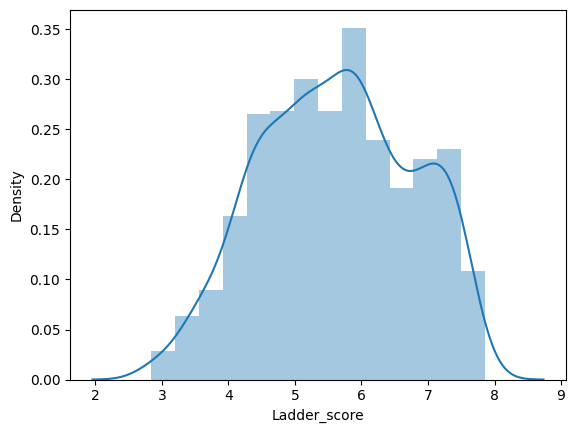

In [108]:
sns.distplot(df['Ladder_score'])

print("Skewness: %f" % df['Ladder_score'].skew())
print("Kurtosis: %f" % df['Ladder_score'].kurt())

Tiene una curtosis y skew normales

In [109]:
df_reduced = df.drop(['Country Code', 'Year'], axis=1, inplace=False)

In [110]:
df_reduced.head()

Ladder_score      GDP_p/c  Beds_p/1000  GINI  Educ_attainment  Unem_NAT  \
0      5.133704  4437.141161         2.89  29.0        43.490341    13.481   
1      5.075469  4247.631343         2.89  29.0        45.279148    13.376   
2      5.017235  4413.063383         2.90  31.8        43.755760    15.866   
3      4.959000  4578.633208         2.88  34.6        45.982704    18.055   
4      4.655000  3952.803574         2.85  32.8        48.186363    17.193   

   Unem_ILO  Access_cooking_tech  Access_electricity  Adolescents_out_school  \
0    13.481                 69.1                99.7                 0.98417   
1    13.376                 71.3                99.9                 0.98417   
2    15.866                 73.1                99.9                 0.98417   
3    18.055                 75.2               100.0                 1.34600   
4    17.193                 76.6               100.0                 0.45536   

   Employee_compensation  Inflation  Control_of_corruption  \
0              31.869680   3.429123              18.957346   
1              32.326034   2.031593              17.061611   
2              30.528337   1.937621              16.587677   
3              29.894073   1.625865              23.557692   
4              30.186097   1.896174              25.238094   

   Business_startup_cost    HDI  
0                   29.3  0.779  
1                   22.4  0.789  
2                   21.2  0.793  
3                   10.1  0.797  
4                   10.3  0.797

In [111]:
print("Find most important features relative to Cantril ladder score")
corr = df_reduced.corr()
corr.sort_values(["Ladder_score"], ascending = False, inplace = True)
print(corr.Ladder_score)

Find most important features relative to Cantril ladder score
Ladder_score              1.000000
HDI                       0.811714
Access_cooking_tech       0.745207
GDP_p/c                   0.744265
Access_electricity        0.672639
Control_of_corruption     0.666924
Educ_attainment           0.566510
Beds_p/1000               0.303619
Unem_NAT                 -0.056653
Unem_ILO                 -0.079556
Inflation                -0.238640
GINI                     -0.265378
Employee_compensation    -0.460452
Business_startup_cost    -0.493565
Adolescents_out_school   -0.560129
Name: Ladder_score, dtype: float64


La tasa de desempleo no parece tener una gran relacion, y el coeficiente GINI no resulto tan significativo como se esperaba. También es notable que la variable de HDI resulto ser la que tiene una mayor relación con nuestra variable de felicidad, puede ser indice de que es un buen indice para el desarrollo.

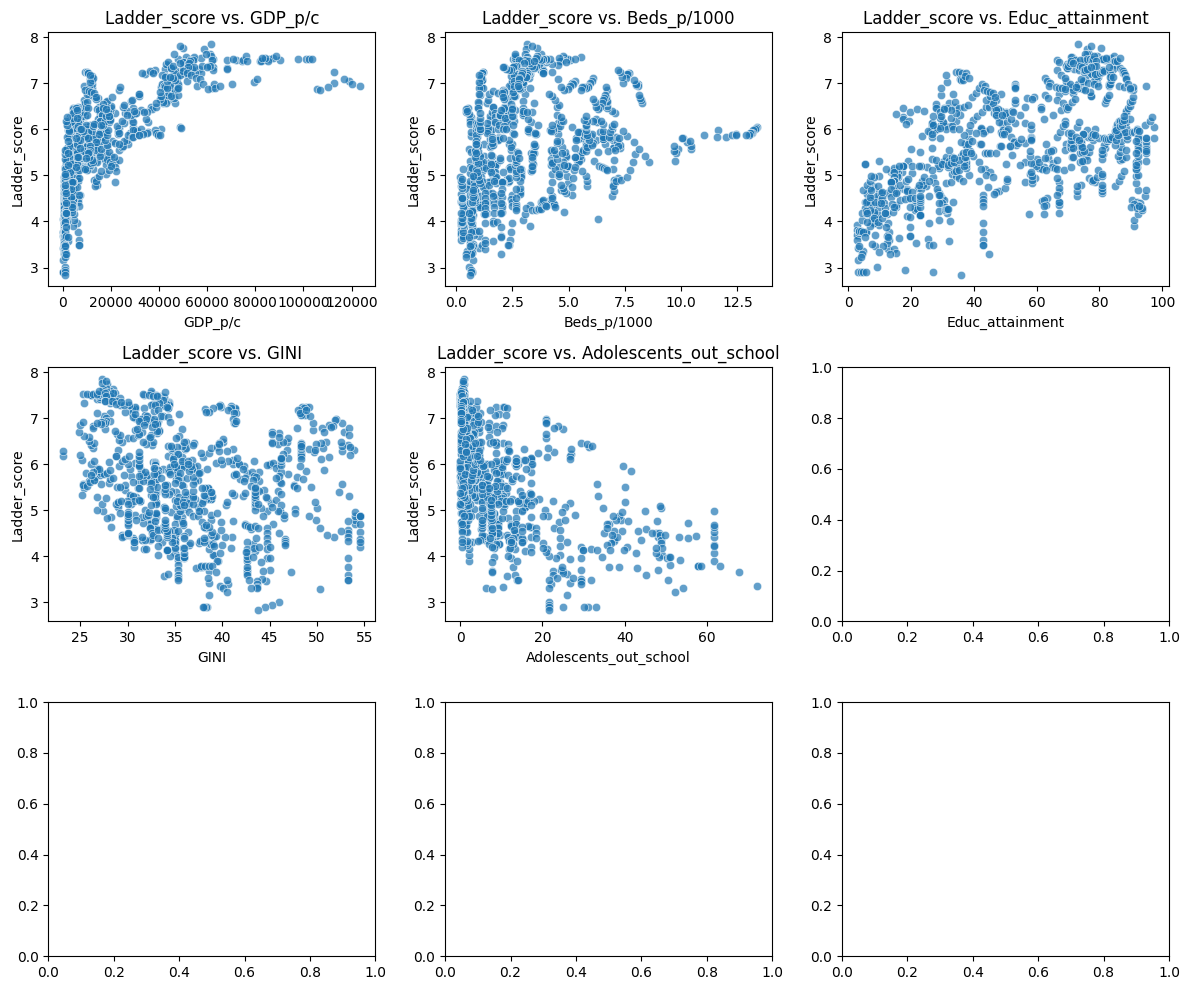

In [112]:
# Define columns to plot against Ladder_score
cols = ["GDP_p/c", "Beds_p/1000", "Educ_attainment", "GINI", "Adolescents_out_school"]
y = "Ladder_score"

# Set up the figure for subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 2x2 grid for four plots

# Plot each variable against Ladder_score
for col, ax in zip(cols, axes.flatten()):
    sns.scatterplot(data=df_reduced, x=col, y=y, ax=ax, alpha=0.7)
    ax.set_title(f'{y} vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()

In [113]:
df_reduced.describe()

Ladder_score        GDP_p/c  Beds_p/1000        GINI  Educ_attainment  \
count    873.000000     873.000000   873.000000  873.000000       873.000000   
mean       5.623203   18029.007684     3.267816   36.907682        51.619624   
std        1.136860   22743.151510     2.564610    7.340363        28.283567   
min        2.839000     216.972971     0.170000   23.200000         2.805490   
25%        4.750519    2257.225284     1.150000   31.500000        26.888550   
50%        5.643442    7714.841844     2.620000   35.300000        52.576836   
75%        6.478000   25459.168900     4.730000   42.400000        77.261360   
max        7.855740  123678.702143    13.380000   54.600000        97.399788   

         Unem_NAT    Unem_ILO  Access_cooking_tech  Access_electricity  \
count  873.000000  873.000000           873.000000          873.000000   
mean     6.924625    7.102470            72.570962           86.143184   
std      5.333192    5.231539            35.396533           25.637450   
min      0.080000    0.249000             0.100000            4.100000   
25%      3.480000    3.646000            44.300000           87.800000   
50%      5.300000    5.470000            94.500000           99.700000   
75%      8.359000    8.715000           100.000000          100.000000   
max     29.579000   29.049000           100.000000          100.000000   

       Adolescents_out_school  Employee_compensation   Inflation  \
count              873.000000             873.000000  873.000000   
mean                10.744021              26.296324    4.639436   
std                 14.102026              13.011322   10.389951   
min                  0.000210               4.755640   -3.233389   
25%                  1.172020              15.345491    1.253699   
50%                  4.996760              24.714549    2.814958   
75%                 13.573830              36.344696    5.652145   
max                 72.155159              65.946219  255.304991   

       Control_of_corruption  Business_startup_cost         HDI  
count             873.000000             873.000000  873.000000  
mean               45.902125              19.106758    0.749511  
std                30.526209              27.446533    0.153726  
min                 0.473934               0.100000    0.383000  
25%                18.095238               2.300000    0.636000  
50%                39.423077               7.600000    0.780000  
75%                72.985779              23.300000    0.882000  
max                97.630333             189.100000    0.961000

In [114]:
#Vistazo a la matriz de correlacion
df_reduced.corr()

Ladder_score   GDP_p/c  Beds_p/1000      GINI  \
Ladder_score                1.000000  0.744265     0.303619 -0.265378   
GDP_p/c                     0.744265  1.000000     0.319317 -0.402742   
Beds_p/1000                 0.303619  0.319317     1.000000 -0.503330   
GINI                       -0.265378 -0.402742    -0.503330  1.000000   
Educ_attainment             0.566510  0.518509     0.696947 -0.543314   
Unem_NAT                   -0.056653 -0.007437     0.050632  0.056619   
Unem_ILO                   -0.079556 -0.031939     0.056894  0.055699   
Access_cooking_tech         0.745207  0.543004     0.550299 -0.358099   
Access_electricity          0.672639  0.395743     0.455240 -0.312425   
Adolescents_out_school     -0.560129 -0.434186    -0.499464  0.285967   
Employee_compensation      -0.460452 -0.448264    -0.473475  0.447453   
Inflation                  -0.238640 -0.197025    -0.069731  0.075793   
Control_of_corruption       0.666924  0.785630     0.346917 -0.339498   
Business_startup_cost      -0.493565 -0.390264    -0.420383  0.353865   
HDI                         0.811714  0.714942     0.579893 -0.432211   

                        Educ_attainment  Unem_NAT  Unem_ILO  \
Ladder_score                   0.566510 -0.056653 -0.079556   
GDP_p/c                        0.518509 -0.007437 -0.031939   
Beds_p/1000                    0.696947  0.050632  0.056894   
GINI                          -0.543314  0.056619  0.055699   
Educ_attainment                1.000000  0.140130  0.125778   
Unem_NAT                       0.140130  1.000000  0.952469   
Unem_ILO                       0.125778  0.952469  1.000000   
Access_cooking_tech            0.755173  0.213861  0.199415   
Access_electricity             0.683913  0.197997  0.188591   
Adolescents_out_school        -0.683244 -0.249992 -0.272429   
Employee_compensation         -0.561673  0.001803 -0.000798   
Inflation                     -0.150351 -0.029024  0.002687   
Control_of_corruption          0.505266  0.141045  0.125004   
Business_startup_cost         -0.621011 -0.221081 -0.215501   
HDI                            0.798867  0.196156  0.173145   

                        Access_cooking_tech  Access_electricity  \
Ladder_score                       0.745207            0.672639   
GDP_p/c                            0.543004            0.395743   
Beds_p/1000                        0.550299            0.455240   
GINI                              -0.358099           -0.312425   
Educ_attainment                    0.755173            0.683913   
Unem_NAT                           0.213861            0.197997   
Unem_ILO                           0.199415            0.188591   
Access_cooking_tech                1.000000            0.856807   
Access_electricity                 0.856807            1.000000   
Adolescents_out_school            -0.738112           -0.729720   
Employee_compensation             -0.466553           -0.399498   
Inflation                         -0.190751           -0.219870   
Control_of_corruption              0.590629            0.422499   
Business_startup_cost             -0.651015           -0.644737   
HDI                                0.901903            0.832664   

                        Adolescents_out_school  Employee_compensation  \
Ladder_score                         -0.560129              -0.460452   
GDP_p/c                              -0.434186              -0.448264   
Beds_p/1000                          -0.499464              -0.473475   
GINI                                  0.285967               0.447453   
Educ_attainment                      -0.683244              -0.561673   
Unem_NAT                             -0.249992               0.001803   
Unem_ILO                             -0.272429              -0.000798   
Access_cooking_tech                  -0.738112              -0.466553   
Access_electricity                   -0.729720              -0.399498   
Adolescents_out_school                1.000

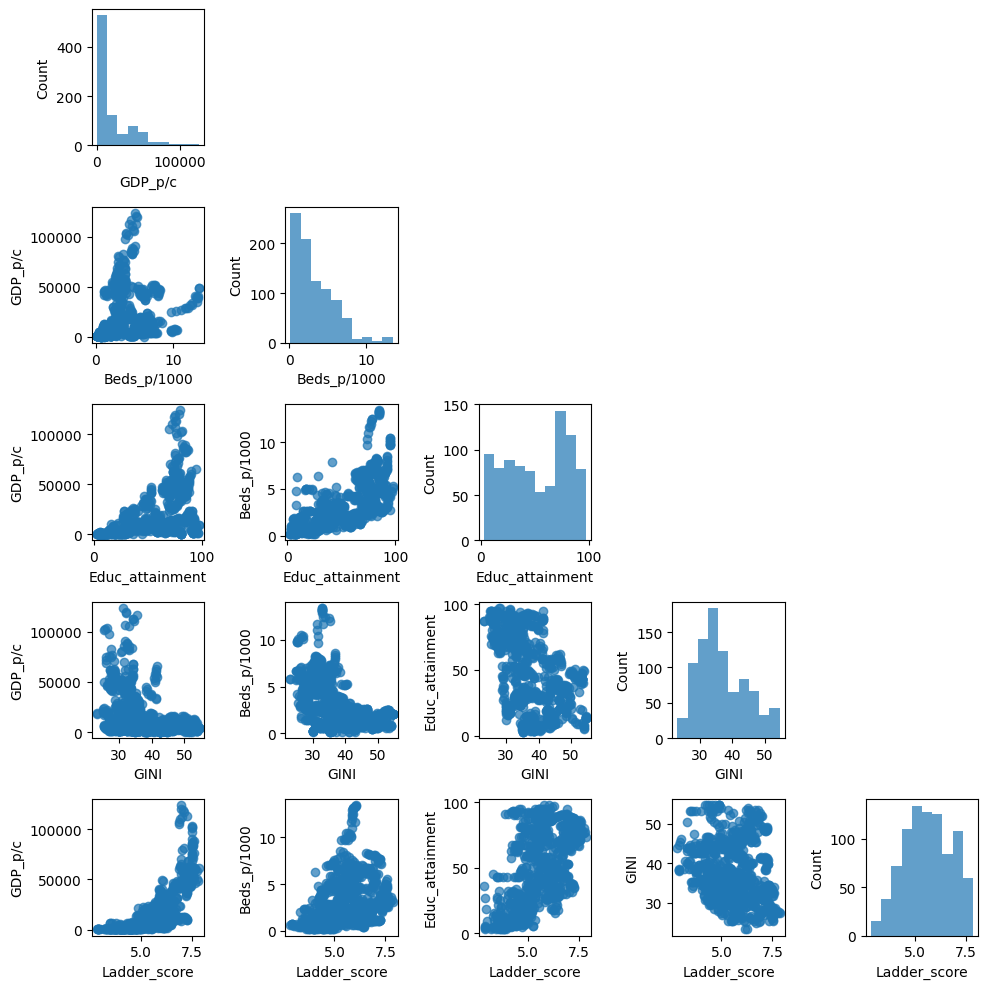

In [115]:
from mlxtend.plotting import scatterplotmatrix
cols = ["GDP_p/c", "Beds_p/1000", "Educ_attainment", "GINI", "Ladder_score"]
scatterplotmatrix(df_reduced[cols].values, figsize=(10, 10),
                  names = cols, alpha = 0.7)
plt.tight_layout()
plt.show()

Observamos que las graficas de felicidad contra las variables elegidas muestran una posible correlacion. La variable de PIB parece tener algun tipo de relación exponencial, vamos a linealizar los datos usando el logaritmo, esto también nos da la idea de una posible regresion exponencial con respecto al PIB.

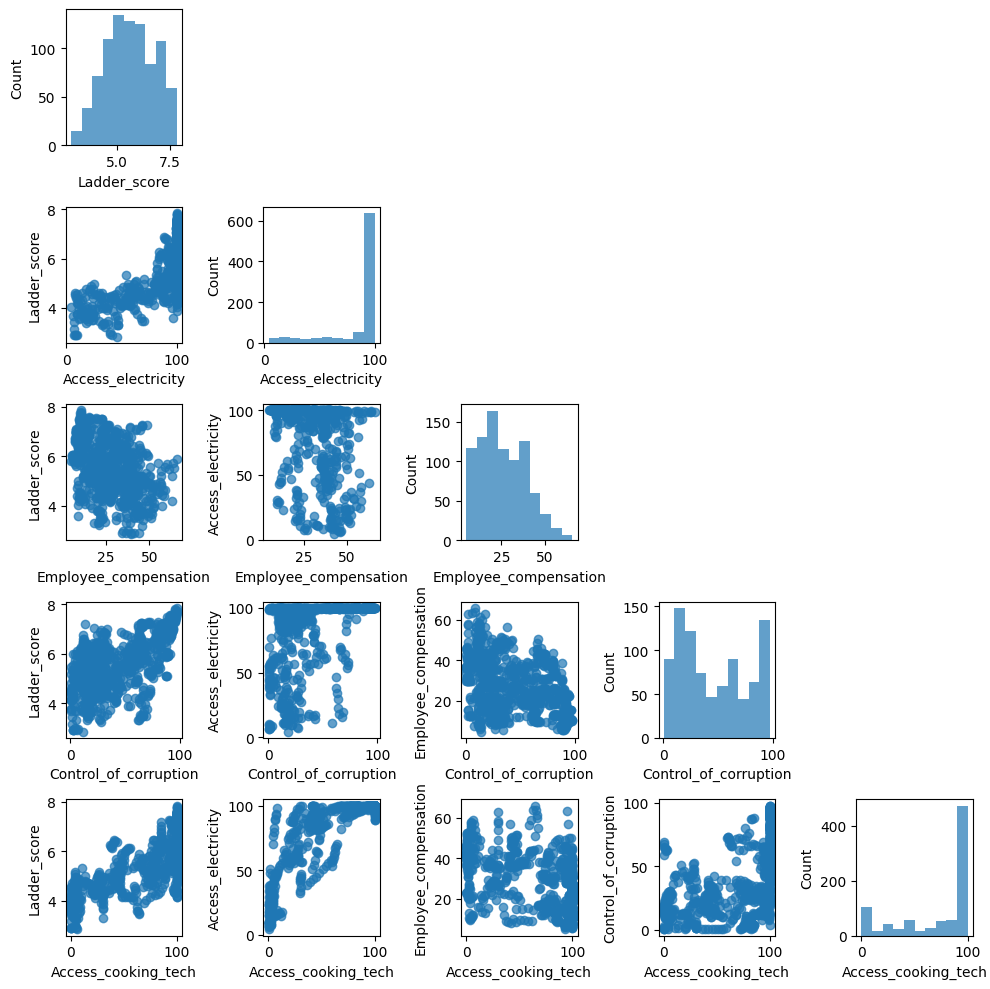

In [116]:
from mlxtend.plotting import scatterplotmatrix
cols = ["Ladder_score",  "Access_electricity", "Employee_compensation", "Control_of_corruption", "Access_cooking_tech"]
scatterplotmatrix(df_reduced[cols].values, figsize=(10, 10),
                  names = cols, alpha = 0.7)
plt.tight_layout()
plt.show()

Aplicandole el logaritmo a la variable de PIB, queremos observar una relación lineal para el analisis de regresion.

In [117]:
df_reduced_log = df_reduced.copy(deep = True)
df_reduced_log['GDP_p/c'] = np.log(df_reduced_log['GDP_p/c'])

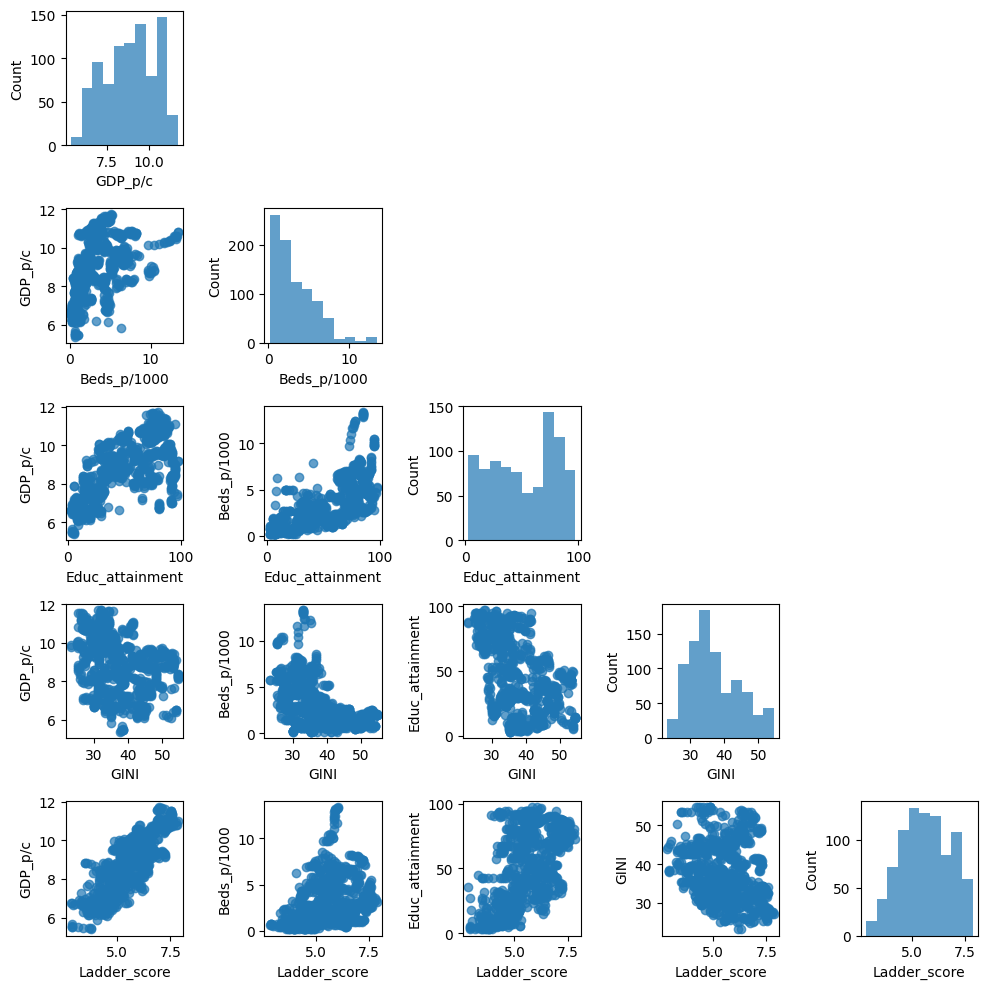

In [118]:
from mlxtend.plotting import scatterplotmatrix
cols = ["GDP_p/c", "Beds_p/1000", "Educ_attainment", "GINI", "Ladder_score"]
scatterplotmatrix(df_reduced_log[cols].values, figsize=(10, 10),
                  names = cols, alpha = 0.7)
plt.tight_layout()
plt.show()

Tras aplicarle el logaritmo al PIB, vemos una relacion lineal con la variable de felicidad, esto nos dice que la relacion entre PIB y la felicidad es, en efecto, exponencial.

In [119]:
print("Find most important features relative to Cantril ladder score")
corr = df_reduced_log.corr()
corr.sort_values(["Ladder_score"], ascending = False, inplace = True)
print(corr.Ladder_score)

Find most important features relative to Cantril ladder score
Ladder_score              1.000000
GDP_p/c                   0.853451
HDI                       0.811714
Access_cooking_tech       0.745207
Access_electricity        0.672639
Control_of_corruption     0.666924
Educ_attainment           0.566510
Beds_p/1000               0.303619
Unem_NAT                 -0.056653
Unem_ILO                 -0.079556
Inflation                -0.238640
GINI                     -0.265378
Employee_compensation    -0.460452
Business_startup_cost    -0.493565
Adolescents_out_school   -0.560129
Name: Ladder_score, dtype: float64


In [120]:
df_reduced_log.corr()

Ladder_score   GDP_p/c  Beds_p/1000      GINI  \
Ladder_score                1.000000  0.853451     0.303619 -0.265378   
GDP_p/c                     0.853451  1.000000     0.494959 -0.357066   
Beds_p/1000                 0.303619  0.494959     1.000000 -0.503330   
GINI                       -0.265378 -0.357066    -0.503330  1.000000   
Educ_attainment             0.566510  0.678660     0.696947 -0.543314   
Unem_NAT                   -0.056653  0.185141     0.050632  0.056619   
Unem_ILO                   -0.079556  0.147225     0.056894  0.055699   
Access_cooking_tech         0.745207  0.848340     0.550299 -0.358099   
Access_electricity          0.672639  0.734783     0.455240 -0.312425   
Adolescents_out_school     -0.560129 -0.675493    -0.499464  0.285967   
Employee_compensation      -0.460452 -0.501717    -0.473475  0.447453   
Inflation                  -0.238640 -0.261239    -0.069731  0.075793   
Control_of_corruption       0.666924  0.814078     0.346917 -0.339498   
Business_startup_cost      -0.493565 -0.598900    -0.420383  0.353865   
HDI                         0.811714  0.951748     0.579893 -0.432211   

                        Educ_attainment  Unem_NAT  Unem_ILO  \
Ladder_score                   0.566510 -0.056653 -0.079556   
GDP_p/c                        0.678660  0.185141  0.147225   
Beds_p/1000                    0.696947  0.050632  0.056894   
GINI                          -0.543314  0.056619  0.055699   
Educ_attainment                1.000000  0.140130  0.125778   
Unem_NAT                       0.140130  1.000000  0.952469   
Unem_ILO                       0.125778  0.952469  1.000000   
Access_cooking_tech            0.755173  0.213861  0.199415   
Access_electricity             0.683913  0.197997  0.188591   
Adolescents_out_school        -0.683244 -0.249992 -0.272429   
Employee_compensation         -0.561673  0.001803 -0.000798   
Inflation                     -0.150351 -0.029024  0.002687   
Control_of_corruption          0.505266  0.141045  0.125004   
Business_startup_cost         -0.621011 -0.221081 -0.215501   
HDI                            0.798867  0.196156  0.173145   

                        Access_cooking_tech  Access_electricity  \
Ladder_score                       0.745207            0.672639   
GDP_p/c                            0.848340            0.734783   
Beds_p/1000                        0.550299            0.455240   
GINI                              -0.358099           -0.312425   
Educ_attainment                    0.755173            0.683913   
Unem_NAT                           0.213861            0.197997   
Unem_ILO                           0.199415            0.188591   
Access_cooking_tech                1.000000            0.856807   
Access_electricity                 0.856807            1.000000   
Adolescents_out_school            -0.738112           -0.729720   
Employee_compensation             -0.466553           -0.399498   
Inflation                         -0.190751           -0.219870   
Control_of_corruption              0.590629            0.422499   
Business_startup_cost             -0.651015           -0.644737   
HDI                                0.901903            0.832664   

                        Adolescents_out_school  Employee_compensation  \
Ladder_score                         -0.560129              -0.460452   
GDP_p/c                              -0.675493              -0.501717   
Beds_p/1000                          -0.499464              -0.473475   
GINI                                  0.285967               0.447453   
Educ_attainment                      -0.683244              -0.561673   
Unem_NAT                             -0.249992               0.001803   
Unem_ILO                             -0.272429              -0.000798   
Access_cooking_tech                  -0.738112              -0.466553   
Access_electricity                   -0.729720              -0.399498   
Adolescents_out_school                1.000

Podemos ver que la variable de felicidad tiene una relacion directa con el logaritmo del PIB, puede reflejar la distribución de los recursos en el mundo moderno, donde ciertos paises tienen muchos más que otros.

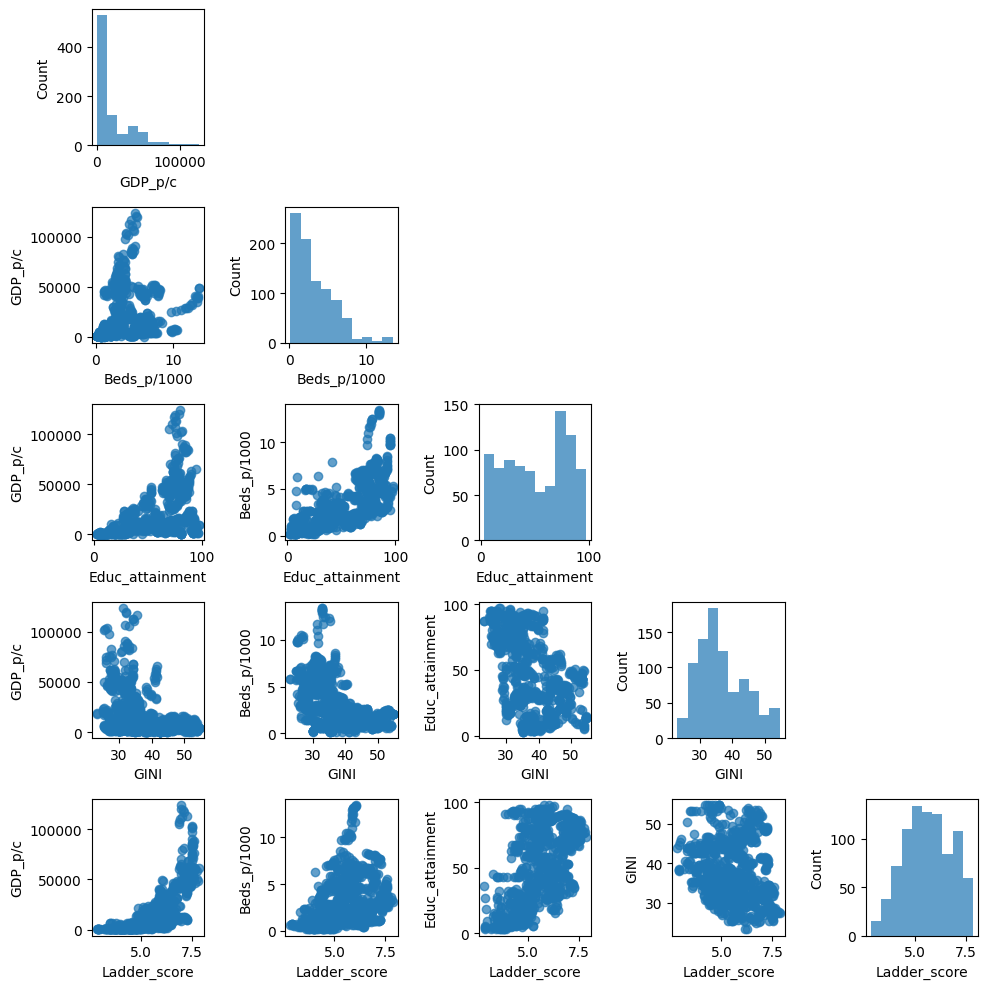

In [121]:
from mlxtend.plotting import scatterplotmatrix
cols = ["GDP_p/c", "Beds_p/1000", "Educ_attainment", "GINI", "Ladder_score"]
scatterplotmatrix(df_reduced[cols].values, figsize=(10, 10),
                  names = cols, alpha = 0.7)
plt.tight_layout()
plt.show()

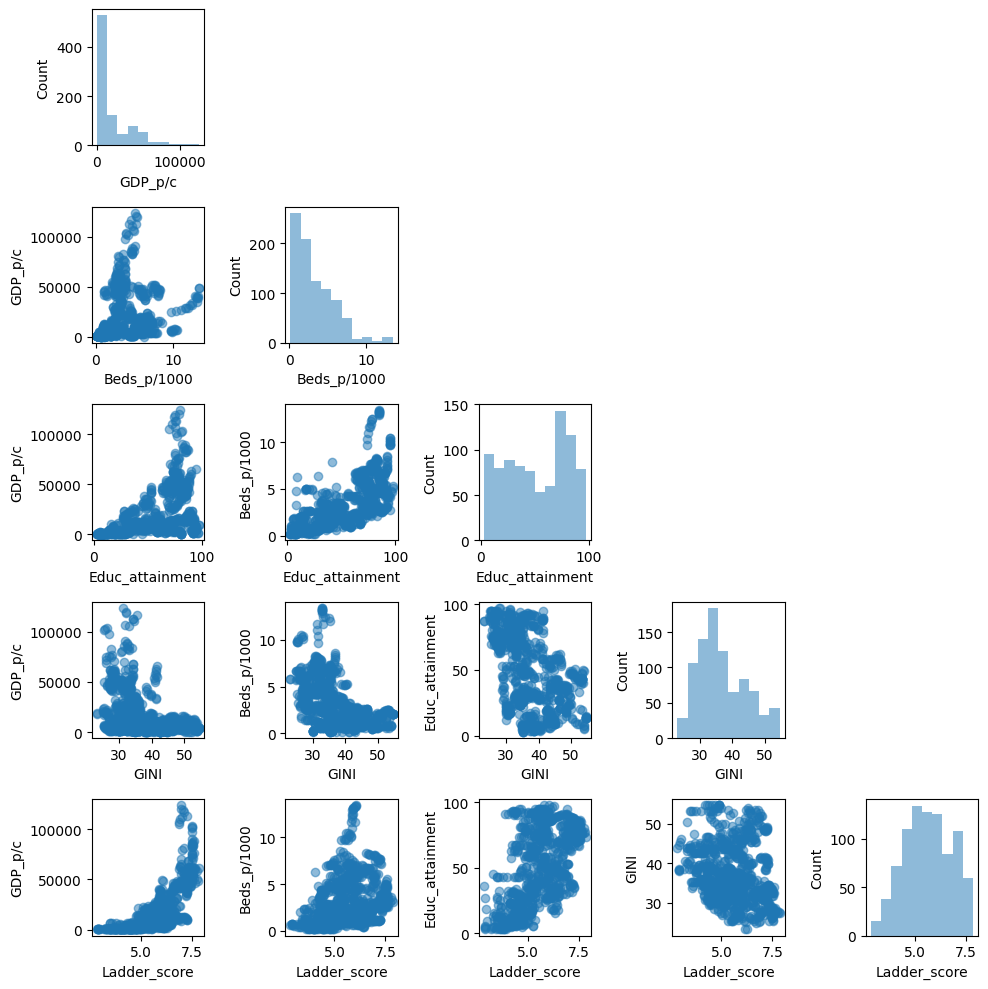

In [122]:
from mlxtend.plotting import scatterplotmatrix
import matplotlib.pyplot as plt

# Define columns to plot
cols = ["GDP_p/c", "Beds_p/1000", "Educ_attainment", "GINI", "Ladder_score"]

# Plot the scatter plot matrix
scatterplotmatrix(df_reduced[cols].values, figsize=(10, 10),
                  names=cols, alpha=0.5, marker='o')  # 'hist' shows histograms on the diagonal

plt.tight_layout()
plt.show()


Podemos ver que el logaritmo de GDP_p/c tiene una relación negativa con el coeficiente GINI, será buena idea hacer agrupamientos para ver como impacta cada variable en diferentes condiciones.

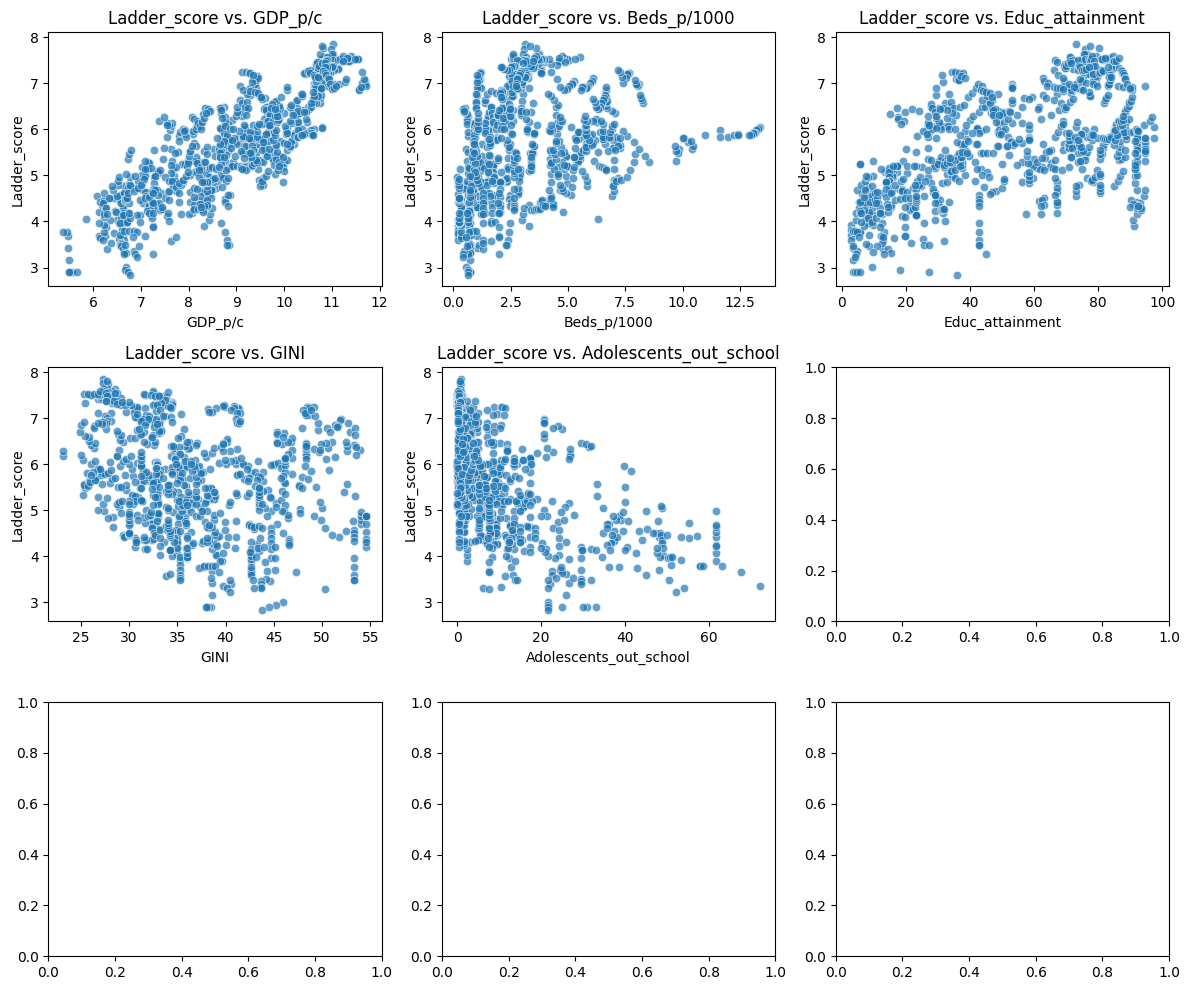

In [123]:
# Define columns to plot against Ladder_score
cols = ["GDP_p/c", "Beds_p/1000", "Educ_attainment", "GINI", "Adolescents_out_school"]
y = "Ladder_score"

# Set up the figure for subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 2x2 grid for four plots

# Plot each variable against Ladder_score
for col, ax in zip(cols, axes.flatten()):
    sns.scatterplot(data=df_reduced_log, x=col, y=y, ax=ax, alpha=0.7)
    ax.set_title(f'{y} vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()


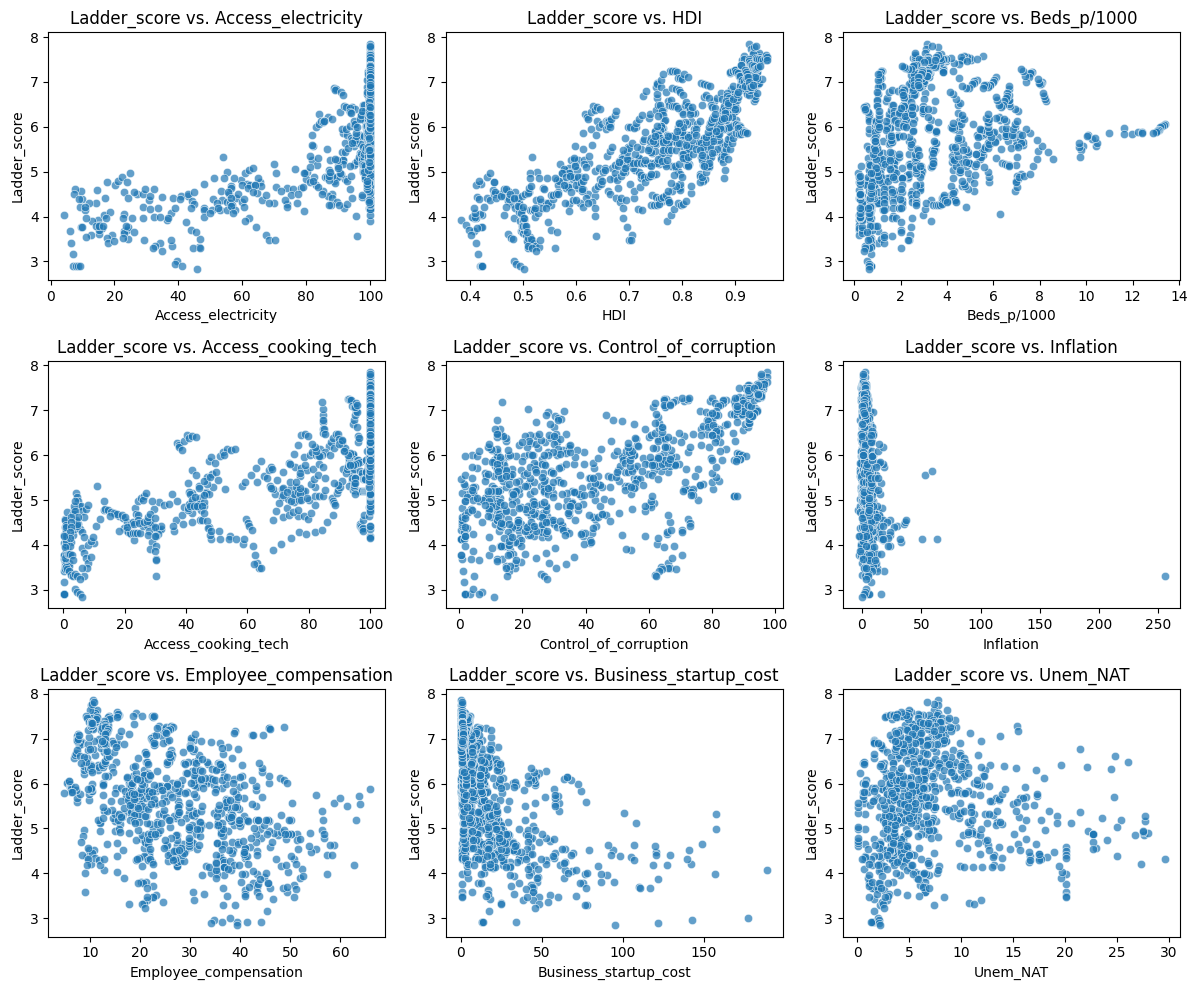

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns to plot against Ladder_score
cols = ["Access_electricity", "HDI", "Beds_p/1000", "Access_cooking_tech", "Control_of_corruption", "Inflation", "Employee_compensation", "Business_startup_cost", "Unem_NAT"]
y = "Ladder_score"

# Set up the figure for subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 2x2 grid for four plots

# Plot each variable against Ladder_score
for col, ax in zip(cols, axes.flatten()):
    sns.scatterplot(data=df_reduced_log, x=col, y=y, ax=ax, alpha=0.7)
    ax.set_title(f'{y} vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()


Hay un outlier en Inflation que no nos deja ver bien los datos

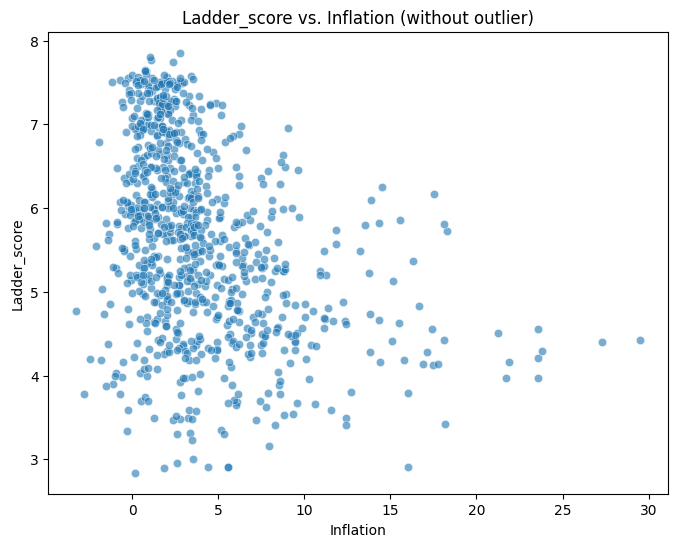

In [125]:
# Define a threshold for Inflation to filter out extreme values
Inflation_threshold = 30  # Adjust as needed based on your data

# Filter the data
df_filtered = df_reduced[df_reduced["Inflation"] < Inflation_threshold]

# Plot Ladder_score against Inflation without the outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x="Inflation", y="Ladder_score", alpha=0.6)
plt.title('Ladder_score vs. Inflation (without outlier)')
plt.xlabel('Inflation')
plt.ylabel('Ladder_score')
plt.show()


In [126]:
#from sklearn.preprocessing import StandardScaler
#df_nuevo = pd.DataFrame()

# Initialize the scaler
#scaler = StandardScaler()


# Fit and transform the data
#columns_to_normalize = ['GDP_p/c', 'Educ_attainment', 'Beds_p/1000', 'GINI', ]
#df_normalized = pd.DataFrame(scaler.fit_transform(df[columns_to_normalize]), columns=columns_to_normalize)

# Analisis de regresion.

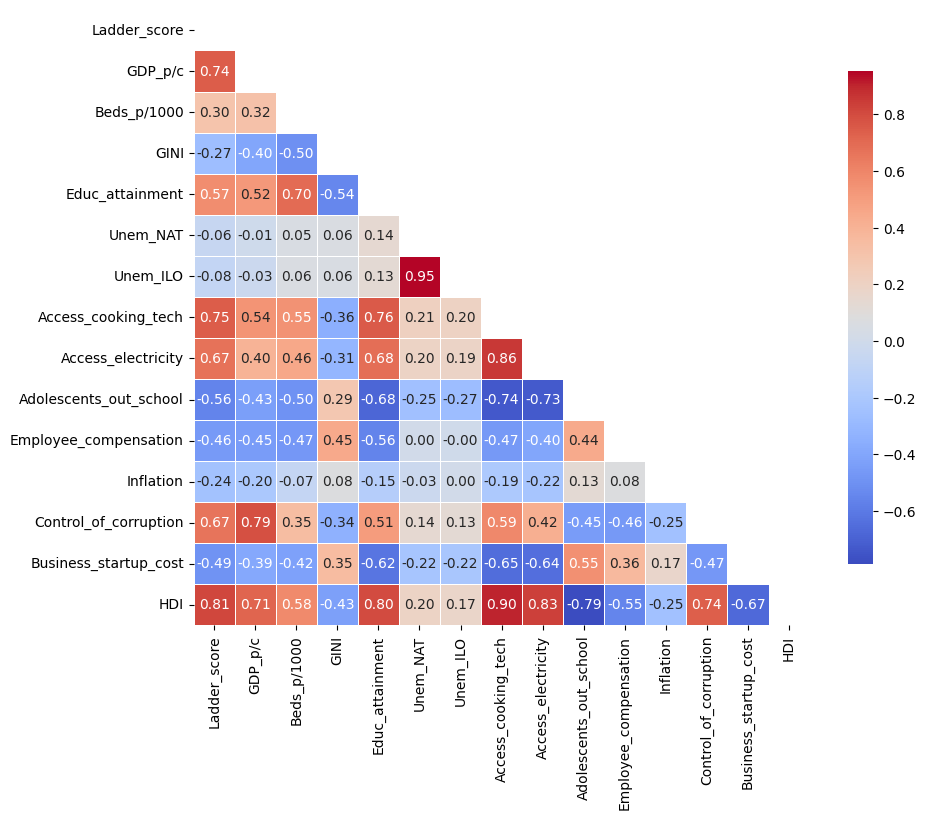

In [127]:
df = df_reduced.copy(deep = True)

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a custom heatmap with the mask and appropriate color scheme
sns.heatmap(
    corr,
    mask=mask,             # Apply the mask to hide the upper triangle
    cmap="coolwarm",       # Choose a color scheme
    annot=True,            # Show values in each cell
    fmt=".2f",             # Format the numbers to two decimal places
    square=True,           # Make each cell square-shaped
    linewidths=0.5,        # Add space between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar slightly
)

# Display the heatmap
plt.show()

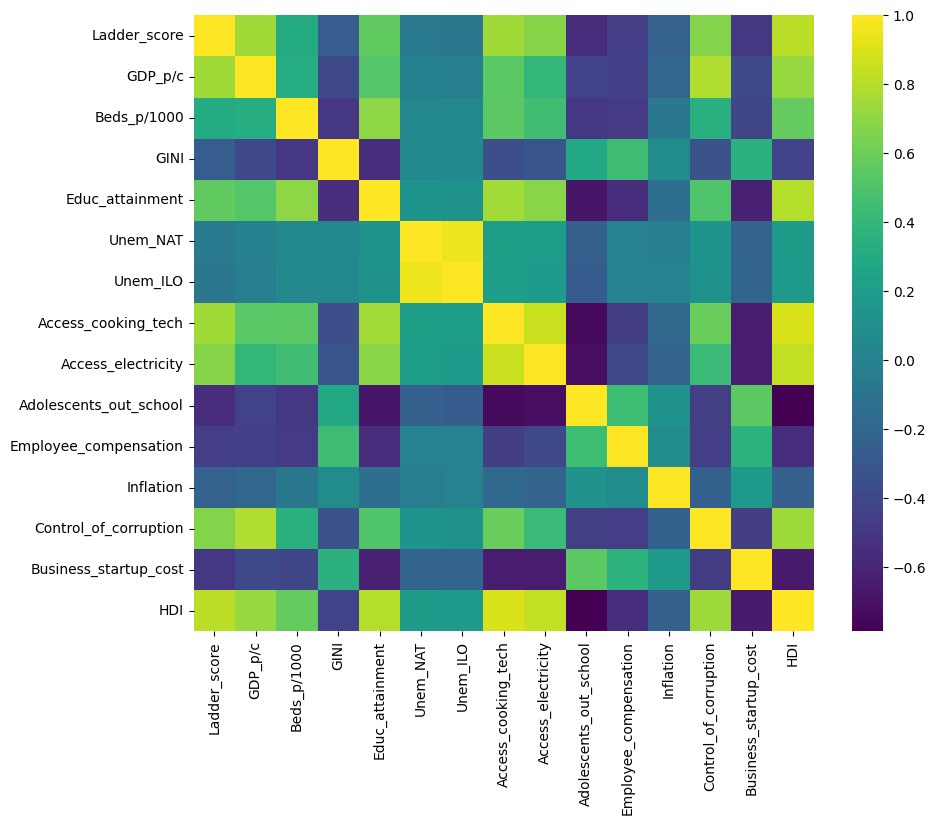

In [128]:
# Sample code assuming `cm` is your matrix, and `df.columns` provides row and column labels

df = df_reduced.copy(deep = True)
cm = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=df.columns, yticklabels=df.columns, annot=False, cmap="viridis", cbar=True)

plt.show()


In [129]:
x = df_reduced_log.drop('Ladder_score', axis = 1)
y = df_reduced_log['Ladder_score']

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 4, test_size = 0.3)

In [132]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [133]:
x_test.shape

(262, 14)

In [134]:
x_train.shape

(611, 14)

In [135]:
y_train.shape

(611,)

In [136]:
Acc = pd.DataFrame()

regressors = [
    ['Linear Regression', LinearRegression()],
    ['Lasso Regression', Lasso(alpha = 0.5)],
    ['Lasso CV', LassoCV(cv = 5)],
    ['Ridge Regression', Ridge(alpha= .5)],
    ['Ridge CV', RidgeCV(cv = 5)]
]

results = []

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    ATrS = model.score(x_train, y_train)
    ATeS = model.score(x_test, y_test)

    results.append({
        'Model': name,
        'RMSE': RMSE,
        'Train Score': ATrS,
        'Test Score': ATeS
    })

Acc = pd.concat([Acc, pd.DataFrame(results)], ignore_index=True)

Acc

Model      RMSE  Train Score  Test Score
0  Linear Regression  0.491851     0.820631    0.816469
1   Lasso Regression  0.788729     0.529780    0.528049
2           Lasso CV  0.489413     0.815380    0.818284
3   Ridge Regression  0.492091     0.820615    0.816291
4           Ridge CV  0.496800     0.818353    0.812757

Podemos ver que el modelo lasso con cross validacion y el modelo linear normalizado tienen un error menor al modelo lasso regular.

In [137]:
df_sin_score = df_reduced_log.drop('Ladder_score', axis = 1)

In [138]:
# Fit the RidgeCV model
model = RidgeCV(cv = 5).fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Combine the intercept and coefficients
coefficients = [model.intercept_] + list(model.coef_)
variable_names = ['Intercept'] + list(x.columns)

# Create the summary table
summary_table = pd.DataFrame({
    "Variable": variable_names,
    "Coefficient": coefficients
})

# Add R-squared as a separate row using pd.concat
r_squared_row = pd.DataFrame({"Variable": ["R-squared"], "Coefficient": [r_squared]})
summary_table = pd.concat([summary_table, r_squared_row], ignore_index=True)


# Display the summary table
print("Regression Results:")
print(summary_table)


Regression Results:
                  Variable  Coefficient
0                Intercept     5.632201
1                  GDP_p/c     0.766262
2              Beds_p/1000    -0.253524
3                     GINI     0.068518
4          Educ_attainment     0.073144
5                 Unem_NAT    -0.261299
6                 Unem_ILO    -0.016379
7      Access_cooking_tech     0.153742
8       Access_electricity     0.117129
9   Adolescents_out_school     0.074250
10   Employee_compensation    -0.081576
11               Inflation    -0.018186
12   Control_of_corruption     0.008168
13   Business_startup_cost     0.025702
14                     HDI     0.142263
15               R-squared     0.812757


Podemos ver que si no le aplicamos el logaritmo al PIB, no tiene un impacto tan significativo en la regresion como la variable de "Human Development Index" que parece tener una relacion lineal con la variable de felicidad.

In [139]:
#Imprimiendo la misma tabla para la regresion Lasso para ver cuales variables fueron desechadas.


In [140]:
list(df_sin_score.columns)

['GDP_p/c',
 'Beds_p/1000',
 'GINI',
 'Educ_attainment',
 'Unem_NAT',
 'Unem_ILO',
 'Access_cooking_tech',
 'Access_electricity',
 'Adolescents_out_school',
 'Employee_compensation',
 'Inflation',
 'Control_of_corruption',
 'Business_startup_cost',
 'HDI']

In [141]:

model = LassoCV().fit(x_train, y_train)
print(model.coef_)

[ 0.89008096 -0.21091297  0.02753212  0.0223745  -0.2616291  -0.
  0.11995267  0.10232498  0.         -0.05468602 -0.00610629  0.
  0.          0.        ]


In [142]:
# Assuming you have split your data into training and testing sets, e.g., X_train, X_test, y_train, y_test

model = LassoCV(cv = 5).fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Combine the intercept and coefficients
coefficients = [model.intercept_] + list(model.coef_)
variable_names = ['Intercept'] + list(x.columns)

print(variable_names.index)
print(coefficients.index)

# Create the summary table
summary_table = pd.DataFrame({
    "Variable": variable_names,
    "Coefficient": coefficients
})

# Add R-squared as a separate row using pd.concat
r_squared_row = pd.DataFrame({"Variable": ["R-squared"], "Coefficient": [r_squared]})
summary_table = pd.concat([summary_table, r_squared_row], ignore_index=True)


# Display the summary table
print("Regression Results:")
print(summary_table)


<built-in method index of list object at 0x79663e8972c0>
<built-in method index of list object at 0x79663e897080>
Regression Results:
                  Variable  Coefficient
0                Intercept     5.632201
1                  GDP_p/c     0.890081
2              Beds_p/1000    -0.210913
3                     GINI     0.027532
4          Educ_attainment     0.022375
5                 Unem_NAT    -0.261629
6                 Unem_ILO    -0.000000
7      Access_cooking_tech     0.119953
8       Access_electricity     0.102325
9   Adolescents_out_school     0.000000
10   Employee_compensation    -0.054686
11               Inflation    -0.006106
12   Control_of_corruption     0.000000
13   Business_startup_cost     0.000000
14                     HDI     0.000000
15               R-squared     0.818284


El modelo Lasso deshecho todas las variables menos la del PIB, acceso a electricidad, acceso a tecnologia para cocinar y porcentaje de poblacion con educacion.

# Modelo no lineal

### INICIALIZACION

In [143]:
!python--version

/bin/bash: line 1: python--version: command not found


In [144]:
!pip install ISLP

import ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=0047e437607fb26339333089e745353bf041a844de537903bbfcecd3b40fe2a8
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [145]:
from ISLP.pygam import (approx_lam,
degrees_of_freedom,
plot as plot_gam,
anova as anova_gam)

In [146]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize, poly)
from statsmodels.stats.anova import anova_lm

In [147]:
from pygam import (s as s_gam, l as l_gam, f as f_gam, LinearGAM, LogisticGAM)

In [148]:
from ISLP.transforms import (BSpline, NaturalSpline)

from ISLP.models import bs, ns

from ISLP.pygam import (approx_lam, degrees_of_freedom, plot as plot_gam, anova as anova_gam)

In [149]:
x = df_reduced_log.drop('Ladder_score', axis = 1)
y = df_reduced_log['Ladder_score']

In [150]:
scaler = StandardScaler()
x0 = scaler.fit_transform(x)
x = pd.DataFrame(x0, columns = x.columns)

Predeciremos el valor con natural spline functions para health, access_cooking,access_elec

In [151]:
ns_beds = NaturalSpline(df = 7).fit(x['Beds_p/1000'])
ns_electricity = NaturalSpline(df = 7).fit(x['Access_electricity'])
ns_cooking = NaturalSpline(df = 7).fit(x['Access_cooking_tech'])
ns_unem = NaturalSpline(df = 7).fit(x['Unem_NAT'])
ns_edu = NaturalSpline(df = 7).fit(x['Educ_attainment'])
ns_gini = NaturalSpline(df = 7).fit(x['GINI'])
ns_PIB = NaturalSpline(df = 7).fit(x['GDP_p/c'])

In [152]:
Xs = [ns_PIB.transform(x['GDP_p/c']), ns_beds.transform(x['Beds_p/1000']),
      ns_electricity.transform(x['Access_electricity']), ns_cooking.transform(x['Access_cooking_tech']),
      ns_unem.transform(x['Unem_NAT']), ns_edu.transform(x['Educ_attainment']), ns_gini.transform(x['GINI'])]

X_bh = np.hstack(Xs)
gam_bh = sm.OLS(y, X_bh).fit()

### Para beds

<function matplotlib.pyplot.show(close=None, block=None)>

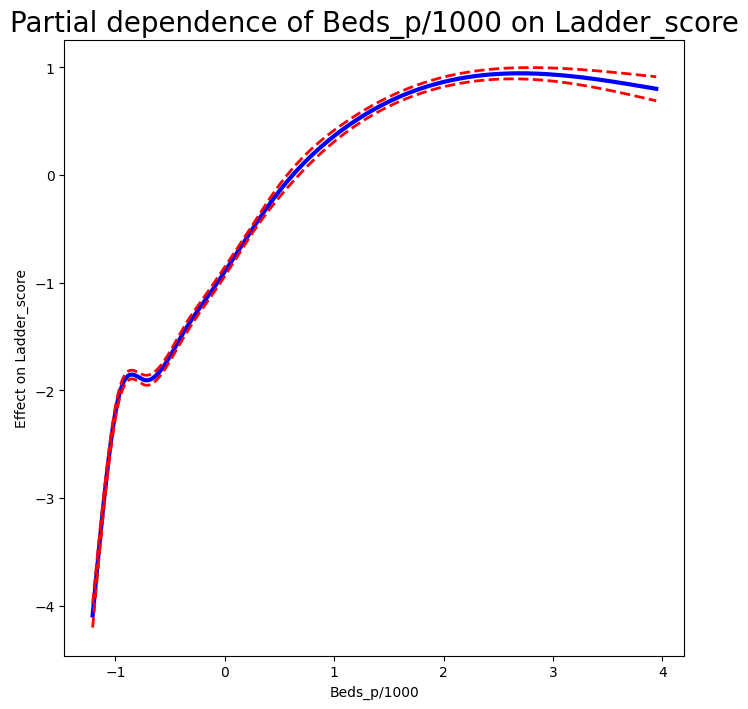

In [153]:
#Efecto de año en Ladder_score:
beds_grid = np.linspace(x['Beds_p/1000'].min(), x['Beds_p/1000'].max(), 873)

x_beds_bh = X_bh.copy()
x_beds_bh[:] = X_bh[:].mean(0)[None,:]
x_beds_bh[:,:7] = ns_beds.transform(beds_grid)
preds = gam_bh.get_prediction(x_beds_bh)
bounds_beds = preds.conf_int(alpha = 0.5)
partial_beds = preds.predicted_mean
center = partial_beds.mean()
partial_beds -= center
bounds_beds -= center
fig, ax = subplots(figsize = (8,8))

ax.plot(beds_grid, partial_beds, 'b', linewidth=3)
ax.plot(beds_grid, bounds_beds[:,0], 'r--', linewidth=2)
ax.plot(beds_grid, bounds_beds[:,1], 'r--', linewidth=2)

ax.set_xlabel('Beds_p/1000')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Beds_p/1000 on Ladder_score', fontsize = 20)
plt.show

### Electricity


<function matplotlib.pyplot.show(close=None, block=None)>

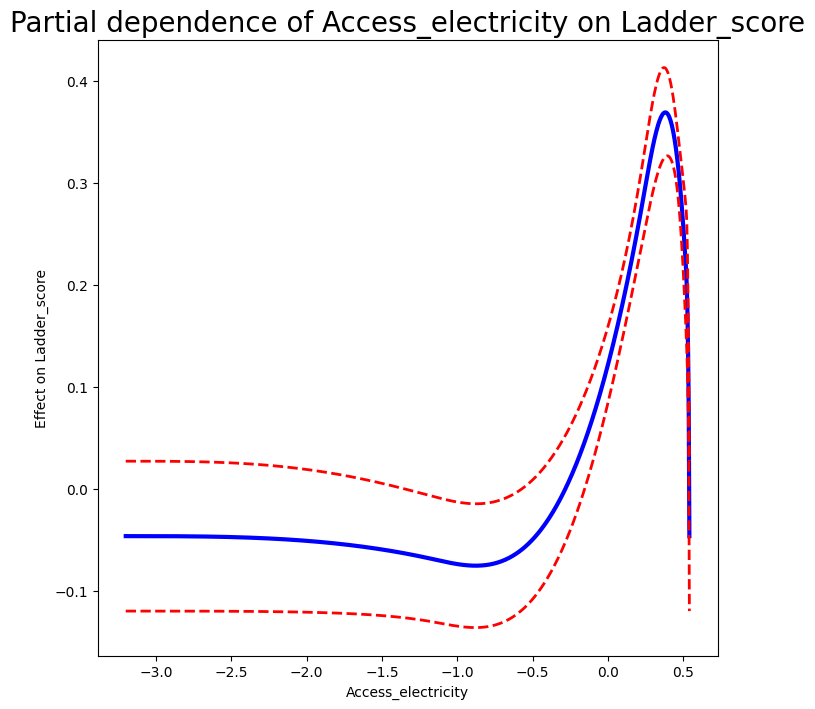

In [154]:
#Efecto de Access_electricity en Ladder_score:
electricity_grid = np.linspace(x['Access_electricity'].min(), x['Access_electricity'].max(), 873)

x_electricity_bh = X_bh.copy()
x_electricity_bh[:] = X_bh[:].mean(0)[None,:]
x_electricity_bh[:,7:14] = ns_electricity.transform(electricity_grid)
preds = gam_bh.get_prediction(x_electricity_bh)
bounds_electricity = preds.conf_int(alpha = 0.5)
partial_electricity = preds.predicted_mean
center = partial_electricity.mean()
partial_electricity -= center
bounds_electricity -= center
fig, ax = subplots(figsize = (8,8))

ax.plot(electricity_grid, partial_electricity, 'b', linewidth=3)
ax.plot(electricity_grid, bounds_electricity[:,0], 'r--', linewidth=2)
ax.plot(electricity_grid, bounds_electricity[:,1], 'r--', linewidth=2)

ax.set_xlabel('Access_electricity')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Access_electricity on Ladder_score', fontsize = 20)
plt.show

### cooking

<function matplotlib.pyplot.show(close=None, block=None)>

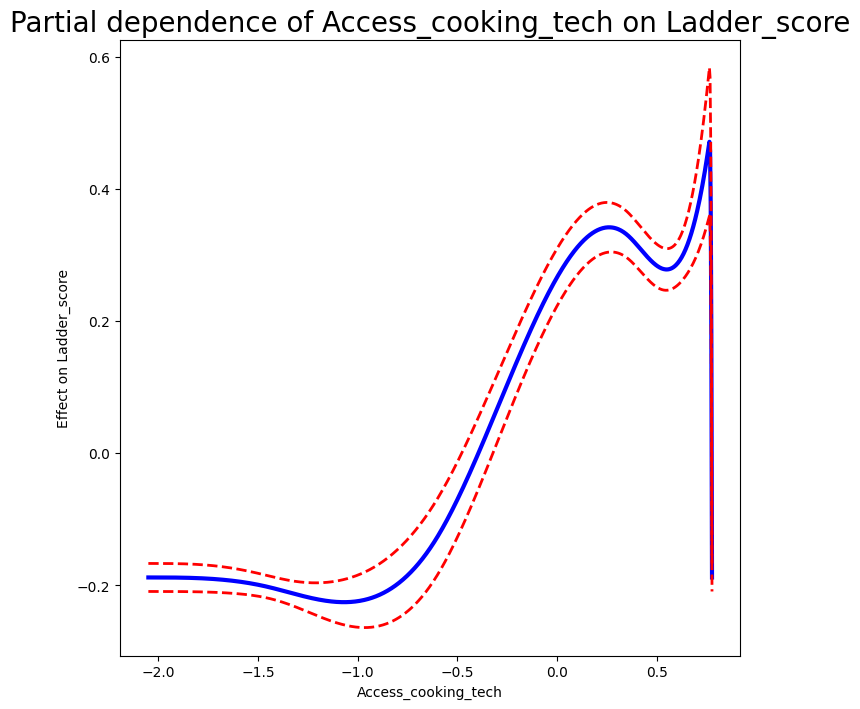

In [155]:
#Efecto de Access_cooking_tech en Ladder_score:
cooking_grid = np.linspace(x['Access_cooking_tech'].min(), x['Access_cooking_tech'].max(), 873)

x_cooking_bh = X_bh.copy()
x_cooking_bh[:] = X_bh[:].mean(0)[None,:]
x_cooking_bh[:,14:21] = ns_cooking.transform(cooking_grid)
preds = gam_bh.get_prediction(x_cooking_bh)
bounds_cooking = preds.conf_int(alpha = 0.5)
partial_cooking = preds.predicted_mean
center = partial_cooking.mean()
partial_cooking -= center
bounds_cooking -= center
fig, ax = subplots(figsize = (8,8))

ax.plot(cooking_grid, partial_cooking, 'b', linewidth=3)
ax.plot(cooking_grid, bounds_cooking[:,0], 'r--', linewidth=2)
ax.plot(cooking_grid, bounds_cooking[:,1], 'r--', linewidth=2)

ax.set_xlabel('Access_cooking_tech')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Access_cooking_tech on Ladder_score', fontsize = 20)
plt.show

### Unemployment

<function matplotlib.pyplot.show(close=None, block=None)>

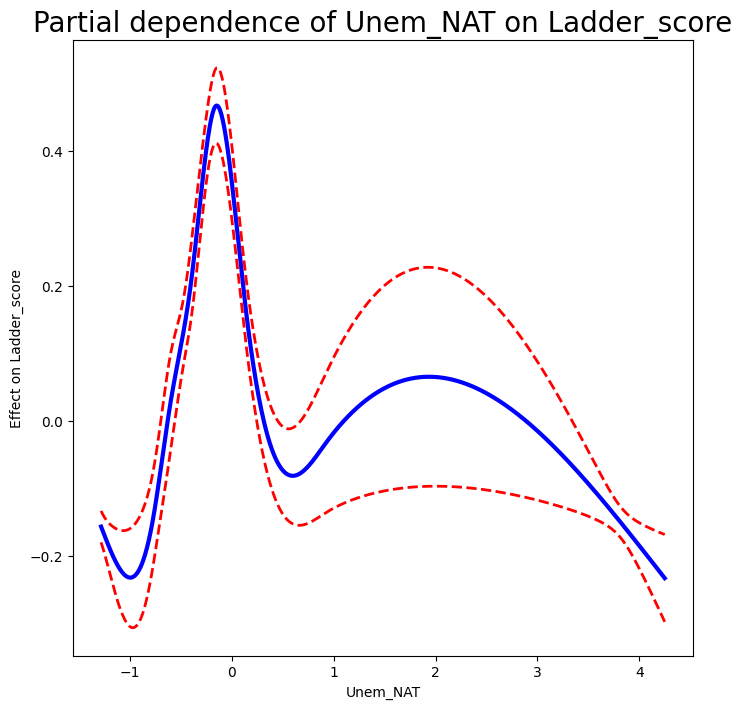

In [156]:
#Efecto de Unem_NAT en Ladder_score:
unem_grid = np.linspace(x['Unem_NAT'].min(), x['Unem_NAT'].max(), 873)

x_unem_bh = X_bh.copy()
x_unem_bh[:] = X_bh[:].mean(0)[None,:]
x_unem_bh[:,21:28] = ns_unem.transform(unem_grid)
preds = gam_bh.get_prediction(x_unem_bh)
bounds_unem = preds.conf_int(alpha = 0.5)
partial_unem = preds.predicted_mean
center = partial_unem.mean()
partial_unem -= center
bounds_unem -= center
fig, ax = subplots(figsize = (8,8))

ax.plot(unem_grid, partial_unem, 'b', linewidth=3)
ax.plot(unem_grid, bounds_unem[:,0], 'r--', linewidth=2)
ax.plot(unem_grid, bounds_unem[:,1], 'r--', linewidth=2)

ax.set_xlabel('Unem_NAT')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Unem_NAT on Ladder_score', fontsize = 20)
plt.show

###  Educacion

<function matplotlib.pyplot.show(close=None, block=None)>

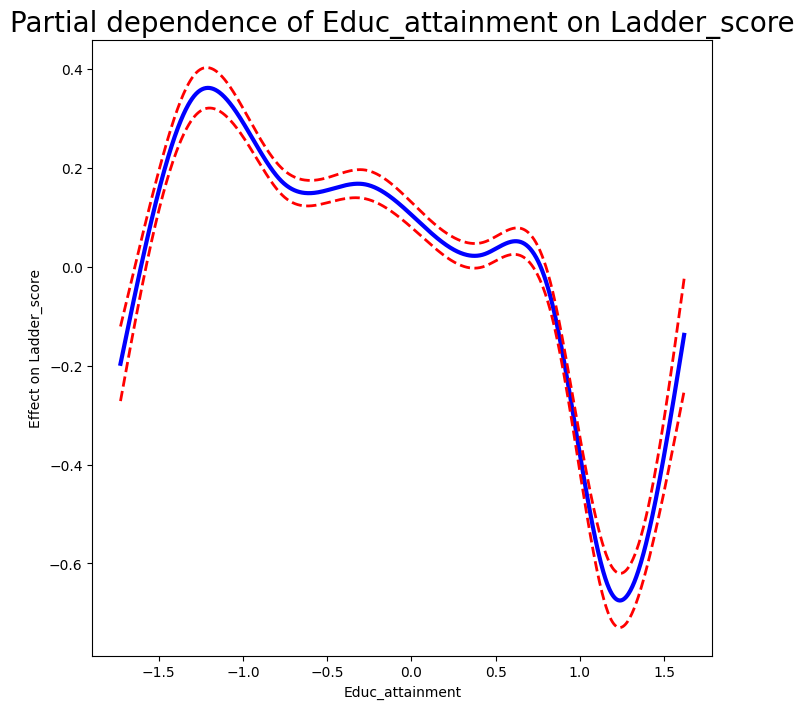

In [157]:
#Efecto de Educ_attainment en Ladder_score:
edu_grid = np.linspace(x['Educ_attainment'].min(), x['Educ_attainment'].max(), 873)

x_edu_bh = X_bh.copy()
x_edu_bh[:] = X_bh[:].mean(0)[None,:]
x_edu_bh[:,28:35] = ns_edu.transform(edu_grid)
preds = gam_bh.get_prediction(x_edu_bh)
bounds_edu = preds.conf_int(alpha = 0.5)
partial_edu = preds.predicted_mean
center = partial_edu.mean()
partial_edu -= center
bounds_edu -= center
fig, ax = subplots(figsize = (8,8))

ax.plot(edu_grid, partial_edu, 'b', linewidth=3)
ax.plot(edu_grid, bounds_edu[:,0], 'r--', linewidth=2)
ax.plot(edu_grid, bounds_edu[:,1], 'r--', linewidth=2)

ax.set_xlabel('Educ_attainment')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Educ_attainment on Ladder_score', fontsize = 20)
plt.show

### GINI

<function matplotlib.pyplot.show(close=None, block=None)>

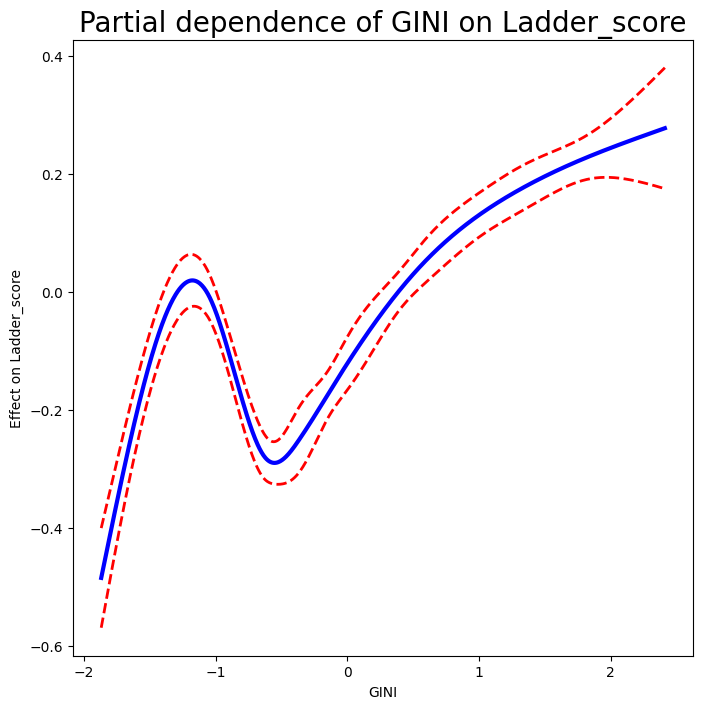

In [158]:
#Efecto de GINI en Ladder_score:
gini_grid = np.linspace(x['GINI'].min(), x['GINI'].max(), 873)

x_gini_bh = X_bh.copy()
x_gini_bh[:] = X_bh[:].mean(0)[None,:]
x_gini_bh[:,35:42] = ns_gini.transform(gini_grid)
preds = gam_bh.get_prediction(x_gini_bh)
bounds_gini = preds.conf_int(alpha = 0.5)
partial_gini = preds.predicted_mean
center = partial_gini.mean()
partial_gini -= center
bounds_gini -= center
fig, ax = subplots(figsize = (8,8))

ax.plot(gini_grid, partial_gini, 'b', linewidth=3)
ax.plot(gini_grid, bounds_gini[:,0], 'r--', linewidth=2)
ax.plot(gini_grid, bounds_gini[:,1], 'r--', linewidth=2)

ax.set_xlabel('GINI')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of GINI on Ladder_score', fontsize = 20)
plt.show

### PIB

<function matplotlib.pyplot.show(close=None, block=None)>

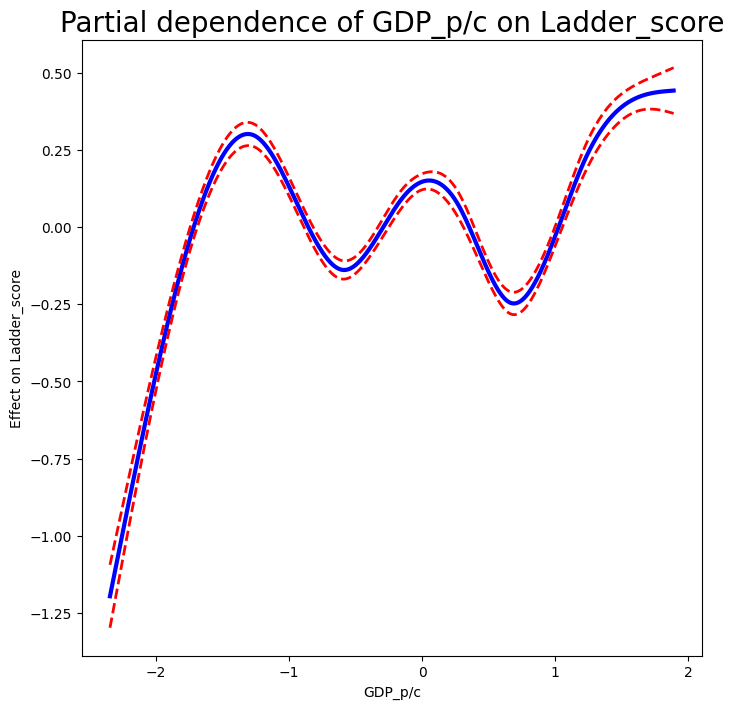

In [159]:
#Efecto de GDP_p/c en Ladder_score:
PIB_grid = np.linspace(x['GDP_p/c'].min(), x['GDP_p/c'].max(), 873)

x_PIB_bh = X_bh.copy()
x_PIB_bh[:] = X_bh[:].mean(0)[None,:]
x_PIB_bh[:,42:49] = ns_PIB.transform(PIB_grid)
preds = gam_bh.get_prediction(x_PIB_bh)
bounds_PIB = preds.conf_int(alpha = 0.5)
partial_PIB = preds.predicted_mean
center = partial_PIB.mean()
partial_PIB -= center
bounds_PIB -= center
fig, ax = subplots(figsize = (8,8))

ax.plot(PIB_grid, partial_PIB, 'b', linewidth=3)
ax.plot(PIB_grid, bounds_PIB[:,0], 'r--', linewidth=2)
ax.plot(PIB_grid, bounds_PIB[:,1], 'r--', linewidth=2)

ax.set_xlabel('GDP_p/c')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of GDP_p/c on Ladder_score', fontsize = 20)
plt.show

In [160]:
 gam_bh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Ladder_score   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2892.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                        0.00
Time:                        12:54:36   Log-Likelihood:                         -563.71
No. Observations:                 873   AIC:                                      1215.
Df Residuals:                     829   BIC:                                      1425.
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9745      0.213      9.274      0.000       1.557       2.392
x2             2.6235      0.206     12.736      0.000       2.219       3.028
x3             3.1399      0.216     14.524      0.000       2.716       3.564
x4             3.9914      0.209     19.134      0.000       3.582       4.401
x5             4.2934      0.175     24.484      0.000       3.949       4.638
x6             7.2179      0.347     20.788      0.000       6.536       7.899
x7             3.7008      0.184     20.142      0.000       3.340       4.061
x8            -0.0684      0.147     -0.465      0.642      -0.358       0.221
x9             0.5108      0.159      3.217      0.001       0.199       0.822
x10            0.2252      0.164      1.370      0.171      -0.097       0.548
x11            0.0415      0.148      0.279      0.780      -0.250       0.333
x12            0.0600      0.169      0.356      0.722      -0.271       0.391
x13            0.4288      0.255      1.683      0.093      -0.071       0.929
x14           -1.3912      0.176     -7.895      0.000      -1.737      -1.045
x15           -0.1342      0.168     -0.801      0.423      -0.463       0.195
x16            0.7659      0.118      6.485      0.000       0.534       0.998
x17            0.3607      0.082      4.379      0.000       0.199       0.522
x18            0.6781      0.181      3.736      0.000       0.322       1.034
const      -7.517e-17   1.87e-16     -0.401      0.688   -4.43e-16    2.93e-16
x19         1.007e-15   1.53e-16      6.596      0.000    7.07e-16    1.31e-15
x20         8.787e-16      2e-16      4.384      0.000    4.85e-16    1.27e-15
x21            0.2136      0.177      1.206      0.228      -0.134       0.561
x22            0.3288      0.154      2.130      0.033       0.026       0.632
x23            0.7901      0.143      5.506      0.000       0.508       1.072
x24           -0.0398      0.132     -0.301      0.764      -0.300       0.220
x25            0.4657      0.508      0.917      0.359      -0.531       1.462
x26        -1.618e-15   1.97e-16     -8.223      0.000      -2e-15   -1.23e-15
x27         7.741e-16   2.35e-16      3.288      0.001    3.12e-16    1.24e-15
x28            0.2520      0.119      2.122      0.034       0.019       0.485
x29            0.4567      0.148      3.085      0.002       0.166       0.747
x30            0.1073      0.131      0.818      0.414      -0.150       0.365
x31            0.3708      0.141      2.626      0.009       0.094       0.648
x32           -1.0428      0.154     -6.752      0.000      -1.346      -0.740
x33            0.3940      0.280      1.405      0.161      -0.157       0.945
x34           -0.3558      0.190     -1.874      0.061      -

## Ahora con Smoothing splines

Con el analisis anterior no se observo ninguna relación lineal, por lo tanto no usaremos ningun ajuste

In [161]:
gam_smooth = LinearGAM(s_gam(0, n_splines = 6) + s_gam(1, n_splines=7) + s_gam(2, n_splines=7) + s_gam(3, n_splines=7) + s_gam(4, n_splines=7) + s_gam(5, n_splines=7)+ s_gam(6, n_splines=7))
Xgam = np.column_stack([x['GDP_p/c'], x['GINI'], x['Educ_attainment'],
                        x['Unem_NAT'], x['Access_electricity'],
                        x['Access_cooking_tech'], x['Beds_p/1000']])
gam_smooth = gam_smooth.fit(Xgam, y)

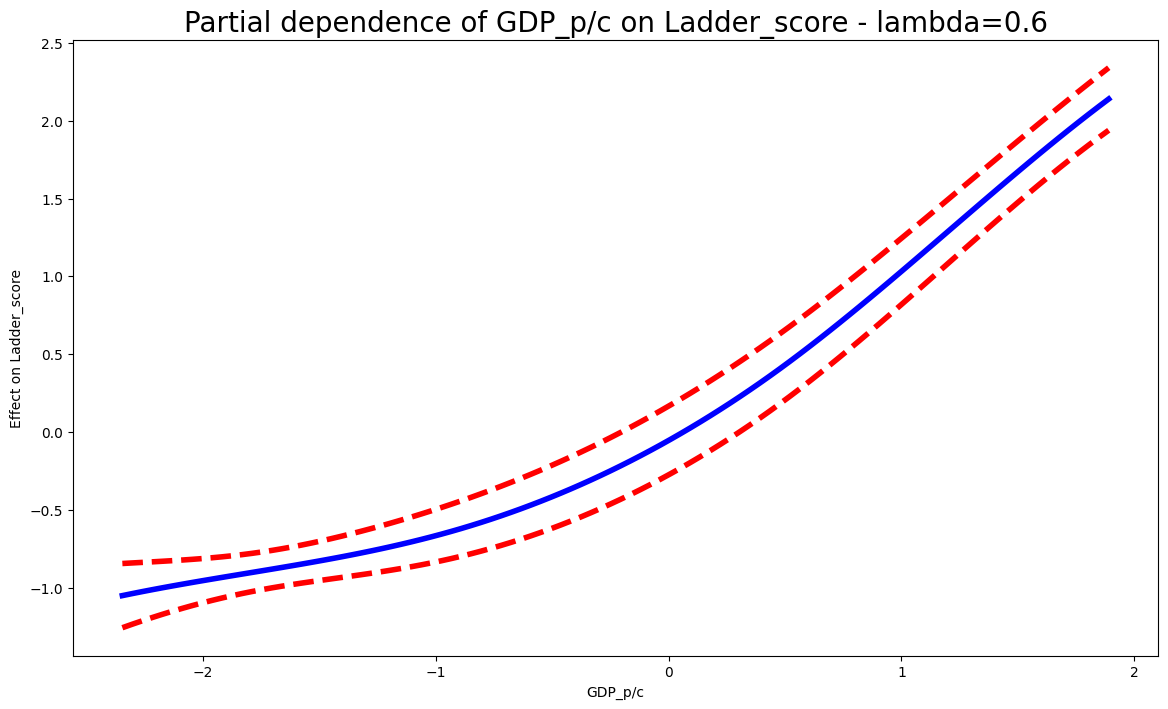

In [162]:
fig, ax = subplots(figsize=(14,8))
plot_gam(gam_smooth, 0, ax=ax)
ax.set_xlabel('GDP_p/c')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of GDP_p/c on Ladder_score - lambda=0.6',
fontsize=20);

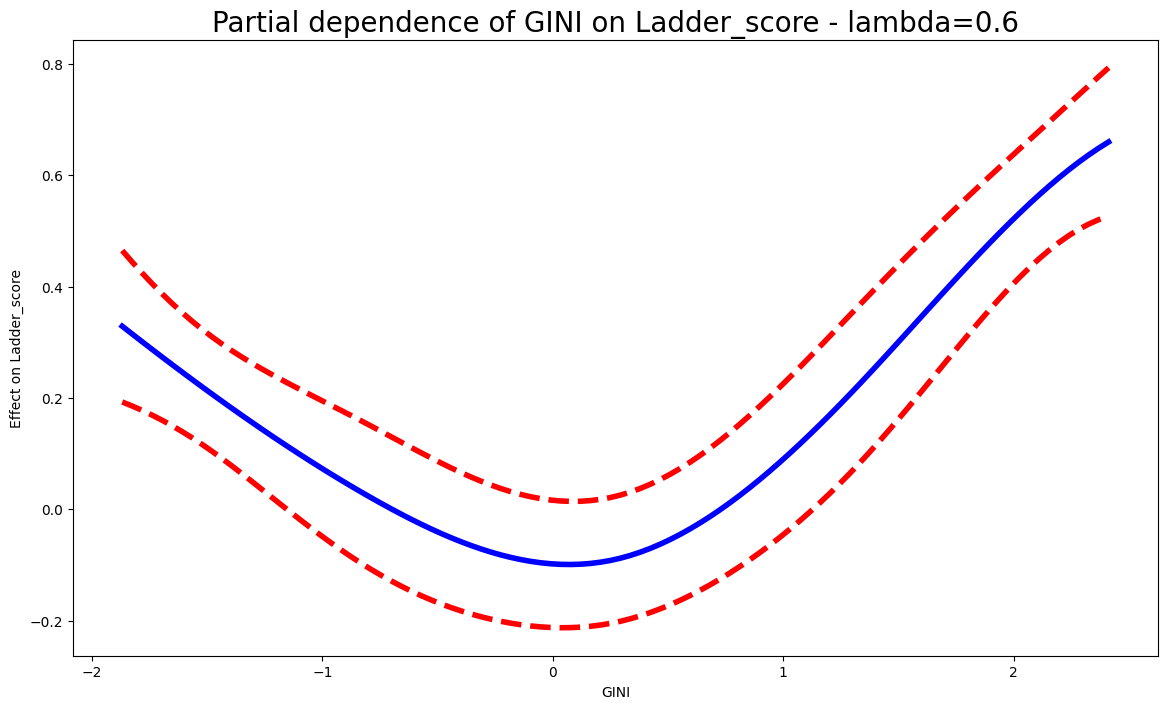

In [163]:
fig, ax = subplots(figsize=(14,8))
plot_gam(gam_smooth, 1, ax=ax)
ax.set_xlabel('GINI')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of GINI on Ladder_score - lambda=0.6',
fontsize=20);

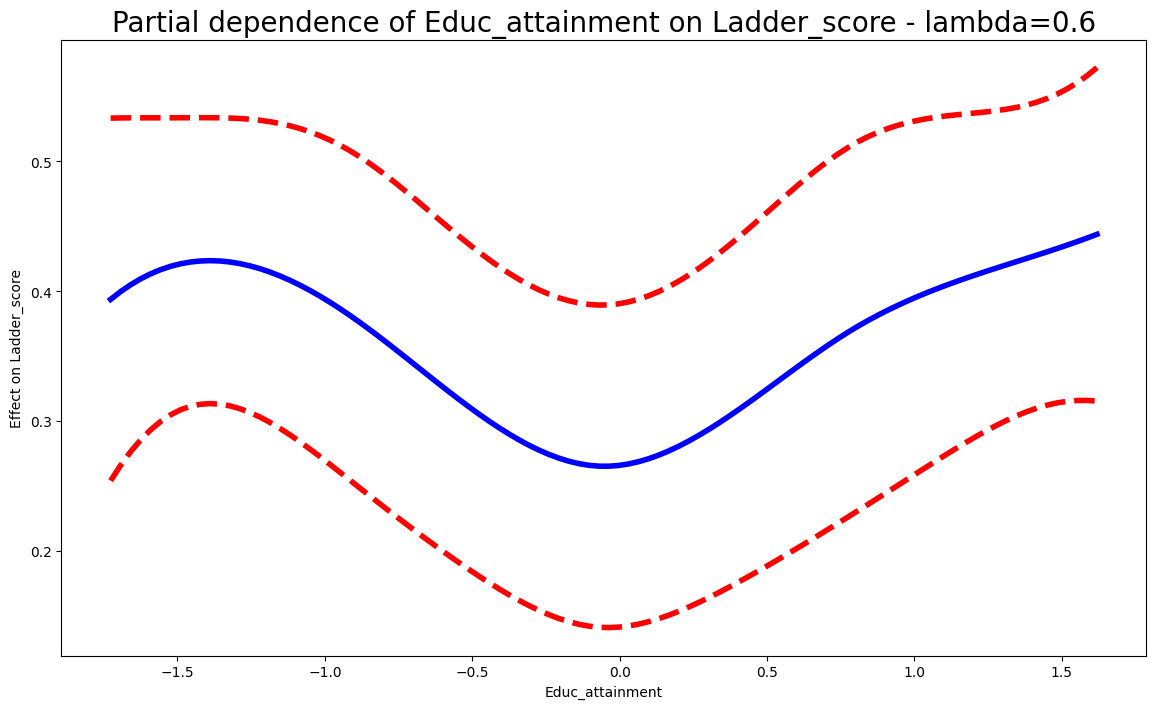

In [164]:
fig, ax = subplots(figsize=(14,8))
plot_gam(gam_smooth, 2, ax=ax)
ax.set_xlabel('Educ_attainment')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Educ_attainment on Ladder_score - lambda=0.6',
fontsize=20);

Tiene un error muy grande

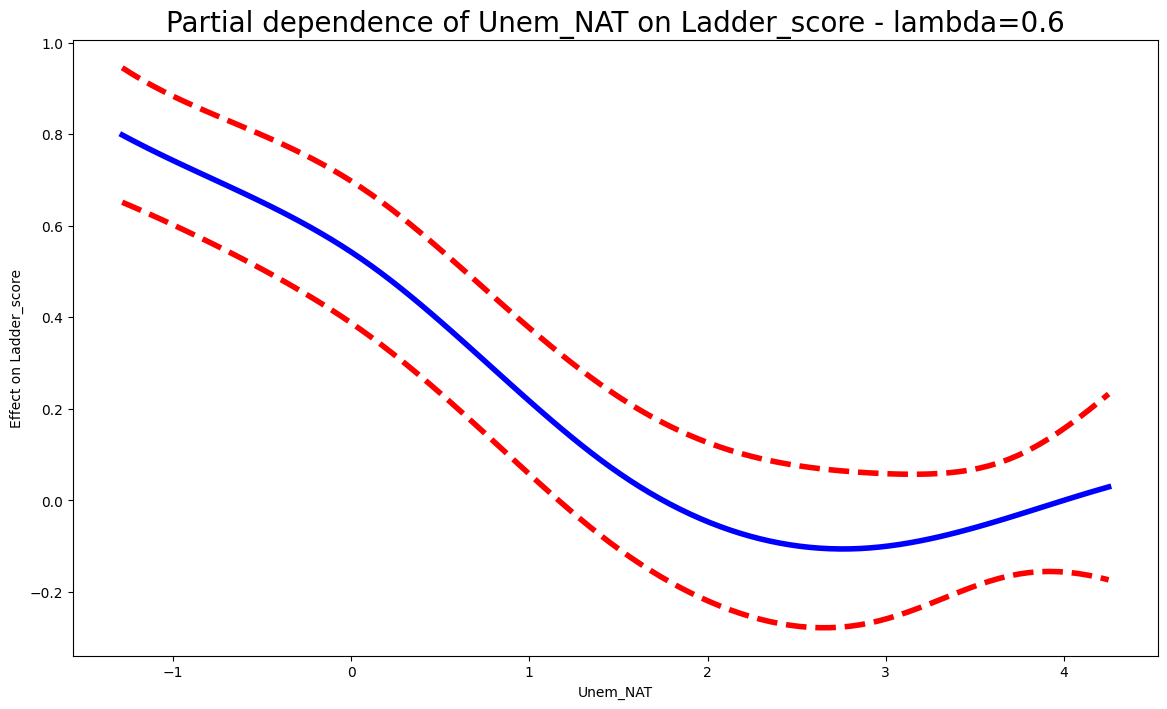

In [165]:
fig, ax = subplots(figsize=(14,8))
plot_gam(gam_smooth, 3, ax=ax)
ax.set_xlabel('Unem_NAT')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Unem_NAT on Ladder_score - lambda=0.6',
fontsize=20);

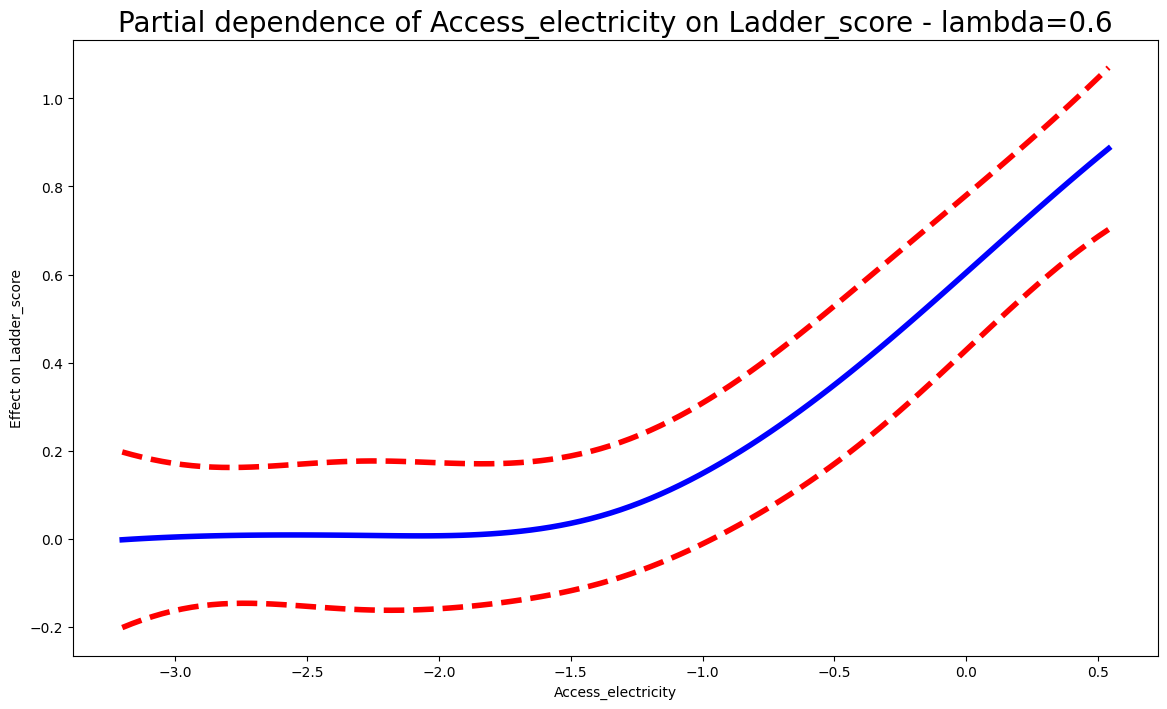

In [166]:
fig, ax = subplots(figsize=(14,8))
plot_gam(gam_smooth, 4, ax=ax)
ax.set_xlabel('Access_electricity')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Access_electricity on Ladder_score - lambda=0.6',
fontsize=20);

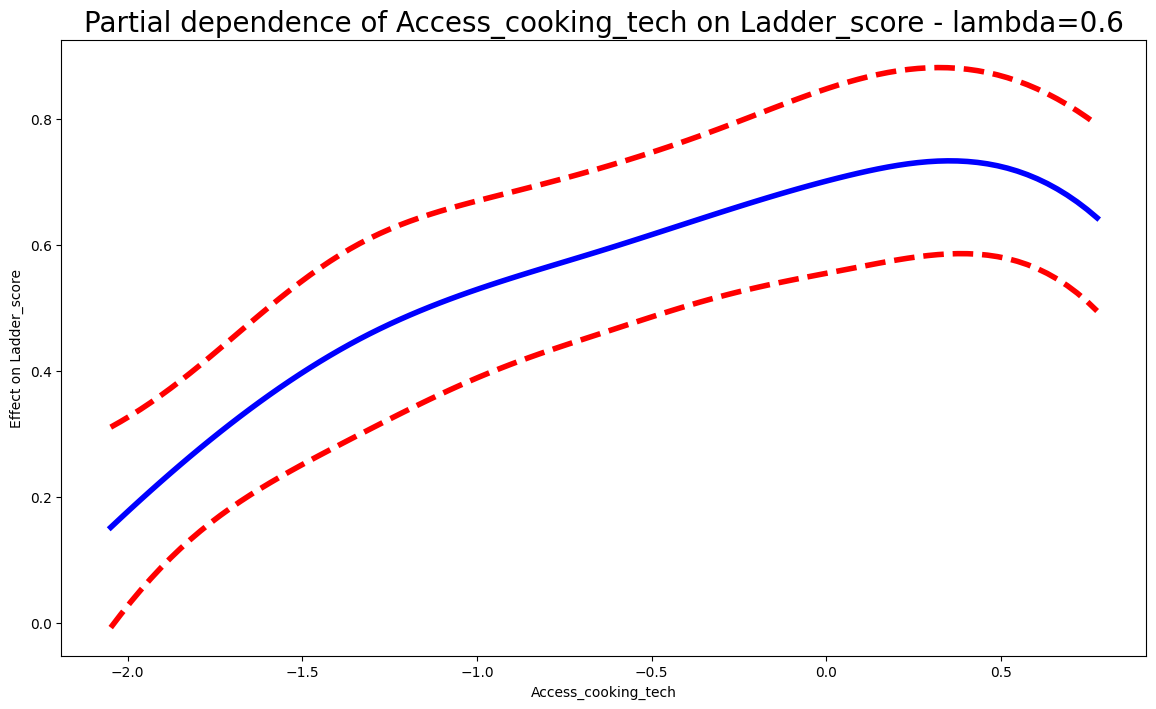

In [167]:
fig, ax = subplots(figsize=(14,8))
plot_gam(gam_smooth, 5, ax=ax)
ax.set_xlabel('Access_cooking_tech')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Access_cooking_tech on Ladder_score - lambda=0.6',
fontsize=20);

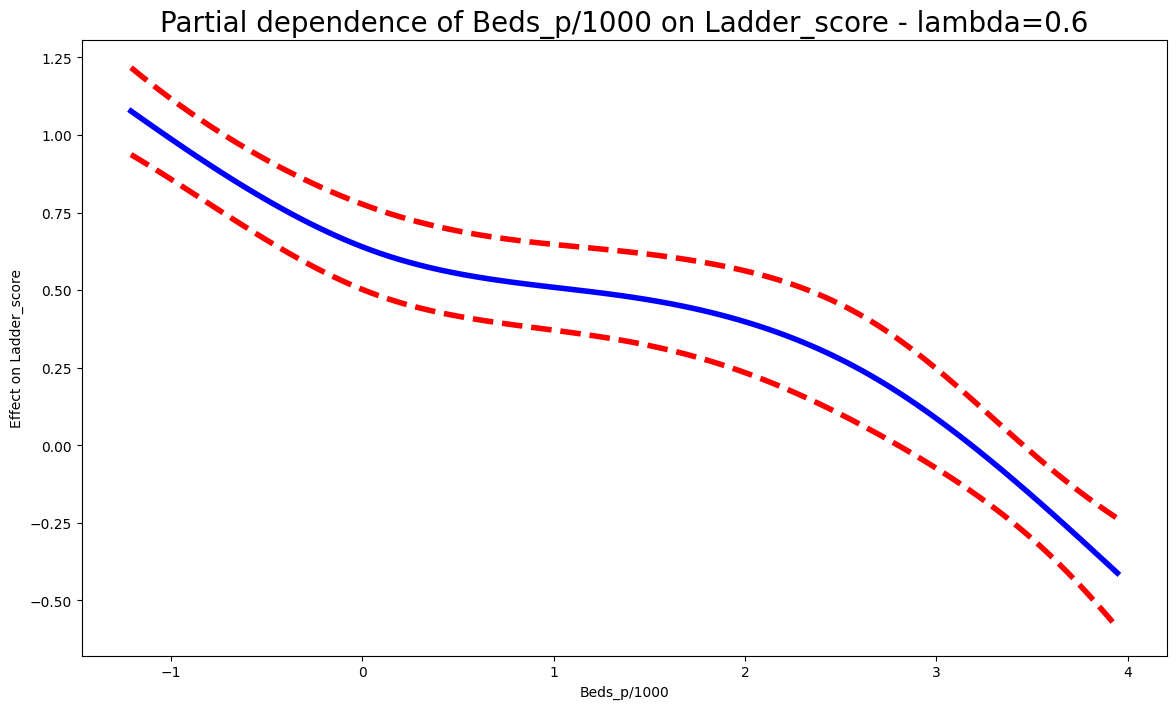

In [168]:
fig, ax = subplots(figsize=(14,8))
plot_gam(gam_smooth, 6, ax=ax)
ax.set_xlabel('Beds_p/1000')
ax.set_ylabel('Effect on Ladder_score')
ax.set_title('Partial dependence of Beds_p/1000 on Ladder_score - lambda=0.6',
fontsize=20);

### Cambiando el ajuste

## Evaluacion

De igual manera que con el modelo de regresion lineal, podemos evaluar la cualidad de nuestro modelo GAM.

In [169]:
gam_bh = sm.OLS(y, X_bh).fit()

In [170]:
gam_smooth = LinearGAM(s_gam(0, n_splines = 6) + s_gam(1, n_splines=7) + s_gam(2, n_splines=7) + s_gam(3, n_splines=7) + s_gam(4, n_splines=7) + s_gam(5, n_splines=7)+ s_gam(6, n_splines=7))
Xgam = np.column_stack([x['GDP_p/c'], x['GINI'], x['Educ_attainment'],
                        x['Unem_NAT'], x['Access_electricity'],
                        x['Access_cooking_tech'], x['Beds_p/1000']])
gam_smooth = gam_smooth.fit(Xgam, y)

In [171]:
#Haciendo un train/test split
x_bh_train, x_bh_test = train_test_split(X_bh, test_size = 0.3, random_state = 4)
x_smooth_train, x_smooth_test = train_test_split(Xgam, test_size = 0.3, random_state = 4)

In [172]:
#
x_bh_train = scaler.fit_transform(x_bh_train)
x_bh_test = scaler.transform(x_bh_test)

x_smooth_train = scaler.fit_transform(x_smooth_train)
x_smooth_test = scaler.transform(x_smooth_test)

In [173]:
# Assuming y_train, y_test, x_bh_train, and x_bh_test are defined

# Fit the models
GAM_NAT = sm.OLS(y_train, x_bh_train).fit()
GAM_S = gam_smooth.fit(x_smooth_train, y_train)

# Define regressors
regressors = [
    ['Smoothing Spline GAM', GAM_S]
]

# Initialize results list
results = []

for name, model in regressors:
    # Make predictions
    if name == 'Natural Spline GAM':
        y_train_pred = model.predict(x_bh_train)
        y_test_pred = model.predict(x_bh_test)

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Calculate R-squared
        train_r2 = model.rsquared  # Training R-squared
        test_r2 = r2_score(y_test, y_test_pred)  # Test R-squared
    else:
        y_train_pred = model.predict(x_smooth_train)
        y_test_pred = model.predict(x_smooth_test)

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Calculate R-squared
        train_r2 = r2_score(y_train, y_train_pred)  # Training R-squared
        test_r2 = r2_score(y_test, y_test_pred)  # Test R-squared

    # Append results to the list
    results.append({
        'Model': name,
        'RMSE': test_rmse,
        'Train R-squared': train_r2,
        'Test R-squared': test_r2
    })

# Display the results
results_df = pd.DataFrame(results)
results_df


Model      RMSE  Train R-squared  Test R-squared
0  Smoothing Spline GAM  0.433378         0.857361        0.857513

# Clasificacion

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn import svm

La regresion nos motivo a tratar de predecir el valor de la variable de felicidad en funcion a las otras variables. Se crearon clases de la variable de felicidad partiendola en intervalos, el modelo usa la base de datos para predecir en que clase de felicidad estaria un pais en funcion de sus variables, PIB, GINI, etc.

## 5 Clases

In [ ]:
df['Ladder_score'].describe()

Podemos ver que la variable de felicidad tiene un maximo de 7.86 y un minimo de 2.83, hagamos clases con respecto a esto para darles clases a los paises en un año dado.

In [ ]:
df_class = df_reduced.copy(deep = True)
# Define the bins and labels
bins = [2.8, 3.8, 4.8, 5.5, 6.4, 7.9]
labels = [0, 1, 2, 3, 4]

# Use pd.cut() to create a new column with labels
df_class['class'] = pd.cut(df_class['Ladder_score'], bins=bins, labels=labels, right=False)

In [ ]:
columns = ['class'] + [col for col in df_class.columns if col != 'class']
df_class = df_class[columns]
df_class.drop('Year', axis = 1, inplace = True)
df_class.drop('Ladder_score', axis = 1, inplace = True)

In [ ]:
df_class.head()

In [ ]:
df_class.info()

In [ ]:
x = df_class.drop('class', axis = 1)
y = df_class['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)

In [ ]:
svc = svm.SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
#print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred))

# Prueba
y_preds = svc.predict(x_test)

frames = [y_test, pd.Series(y_preds)]
preds_df = pd.concat(frames, axis=1)
preds_df = preds_df.rename(columns={0:"preds"})
preds_df

In [ ]:
#Confusion Matrix"""

plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Poor score\n 1 - Moderately poor\n 2 - Moderate score\n 3 - Moderately good\n 4 - Good score', size=14, c='green')
plt.tight_layout(); plt.show()

# Generar y mostrar la matriz de confusión
ConfusionMatrixDisplay.from_estimator(svc, x_test, y_test, display_labels=['0', '1', '2', '3', '4'])
plt.show()

confusion = metrics.confusion_matrix(y_test, y_preds)
confusion.ravel()


Podemos ver que este modelo fue exitoso prediciendo la clase para los países que tienen una variable de felicidad alta.

## 3 clases

In [ ]:
df_class = df_reduced.copy(deep = True)
# Define the bins and labels
bins = [2.8, 4.8, 6.4, 7.9]
labels = [0, 1, 2]

# Use pd.cut() to create a new column with labels
df_class['class'] = pd.cut(df_class['Ladder_score'], bins=bins, labels=labels, right=False)

In [ ]:
x = df_class.drop('class', axis = 1)
y = df_class['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)

In [ ]:
mdl = svm.SVC(probability=True)
mdl.fit(x_train,y_train)
y_pred = mdl.predict(x_test)
#print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred))

# Prueba
y_preds = mdl.predict(x_test)

frames = [y_test, pd.Series(y_preds)]
preds_df = pd.concat(frames, axis=1)
preds_df = preds_df.rename(columns={0:"preds"})
preds_df

In [ ]:
#Confusion Matrix"""

plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Poor score\n 1 - Moderately poor\n 2 - Moderate score\n 3 - Moderately good\n 4 - Good score', size=14, c='green')
plt.tight_layout(); plt.show()

# Generar y mostrar la matriz de confusión
ConfusionMatrixDisplay.from_estimator(mdl, x_test, y_test, display_labels=['0', '1', '2'])
plt.show()

confusion = metrics.confusion_matrix(y_test, y_preds)
confusion.ravel()
